In [1]:
# Step1: Setup
Import pandas as pd

SyntaxError: invalid syntax (1613225145.py, line 2)

In [2]:
import pandas as pd

In [5]:
# Load dataset
df=pd.read_csv('../data/inputs/raw/Online_Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [6]:
# Data Cleasing Steps
# Find out what to clean

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Based on the df.info() etnry , we learn that there are 541,909 rows in the dataset, the dataset contains 8 columns - INvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country 

In [9]:
# df info() entry also tell me that Description Column got missing description 541909 vs 540455, ie. 1454 rows are missing
# InvoiceDate is showing dtype as an object, we should convert this to datetime


In [10]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# this entry shows me Quanity, UnitPrice and CustomerID. In the count row, all 3 columns have 541,909 entries, which means no missing values in these columns
# mean - average value of each column Qty = 9.55 per trnx, UnitPrice 4.61
# std - standard deviation shows that quantity has a large spread 218 vs 9.55, which suggests soeme outliers in the dataset.
#       UnitPrice also has a large spread 96.76 vs 4.61, which suggests some high prices in some trnx
# Qty wise, 25% of trnx had <=1, 50% had <=3 and 75% had <=10.  This shows that most orders are small.
# Next step, checking negative values:

df = df[(df['Quantity'] >0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [13]:
# the above entry resulted to have 530104 rows vs 541909 original total count. there are 11805 rows been filtered out
# checking the total count again to verify the changes

df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15292.571875
std,155.524124,35.915681,1484.197955
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,14383.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,13541.330000,18287.000000


In [15]:
# chek outliers 

df = df['Quantity'].quantile(0.99)

df

IndexError: invalid index to scalar variable.

In [16]:
df = df['Quantity'].quantile(0.99)


IndexError: invalid index to scalar variable.

In [17]:
df['Quantity'].quantile(0.99)

IndexError: invalid index to scalar variable.

In [18]:
df = pd.read_csv("../data/inputs/raw/Online_Retail.csv", encoding="ISO-8859-1")

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df['Quantity'].quantile(0.99)

np.float64(100.0)

In [21]:
# the above entry confirms that 99% of trnx have Qty <= 100 items.  
# check 1% trnx have > 100 items for outliers

df[df['Quantity'] > 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029,United Kingdom
...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,15694,United Kingdom
541286,581497,22355,CHARLOTTE BAG SUKI DESIGN,110,2011-12-09 10:23:00,2.46,15287,United Kingdom
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,12985,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102,United Kingdom


In [22]:
# the result shows that there are 4950 rows/trnx have order > 100 units
# next step: clean and prepare data
# conver InvoiceDate from object to  object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


In [24]:
# check total missing values per column

df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [25]:
# the result shows that there are 1454 missing values NaN in the Description column only
# check the % of missing value to decise to drop or fill the missing  values

df[df.isnull().any(axis=1)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,15287,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,15287,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,15287,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom


In [26]:
df.isnull().mean() * 100

InvoiceNo      0.000000
StockCode      0.000000
Description    0.268311
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

In [27]:
# the missing values in  the Description column represents 26.8%. it is best to drop because 
#  the unknown value will distort the product aggregations
# so will remove the NaN and use cleaned file not to overwritten the orignal dataset. In case things went wrong i have a backup

df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [28]:
# update the InvoiceDate from object to datetime object due to df_cleaned is now the file to be updated

df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

C:\Users\selin\AppData\Local\Temp\ipykernel_1536\3156727095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [29]:
df_cleaned.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [30]:
# Drop rows where CustomerID or Description is missing 
# Inplace=True modifies in DataFrame directly in memory instead of the original CSV file

df_cleaned = df_cleaned.dropna(subset=['CustomerID', 'Description'])

In [31]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [32]:
df_cleaned.sample(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86585,543555,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2011-02-10 10:18:00,1.25,17686,United Kingdom
52263,540700,21581,SKULLS DESIGN COTTON TOTE BAG,6,2011-01-11 09:47:00,2.25,12393,Australia
451248,575190,22138,BAKING SET 9 PIECE RETROSPOT,24,2011-11-09 09:21:00,4.25,15189,United Kingdom
237280,557850,23236,DOILEY STORAGE TIN,6,2011-06-23 10:56:00,2.89,12720,Germany
347169,567290,22329,ROUND CONTAINER SET OF 5 RETROSPOT,48,2011-09-19 11:54:00,1.45,14646,Netherlands
...,...,...,...,...,...,...,...,...
207680,554998,22423,REGENCY CAKESTAND 3 TIER,3,2011-05-29 15:35:00,12.75,15925,United Kingdom
362832,568526,21811,HANGING HEART WITH BELL,48,2011-09-27 13:04:00,0.39,17656,United Kingdom
144200,548732,22614,PACK OF 12 SPACEBOY TISSUES,24,2011-04-04 10:16:00,0.29,16142,United Kingdom
248045,558777,23089,GLASS BON BON JAR,1,2011-07-04 10:23:00,3.29,15287,United Kingdom


In [33]:
df_cleaned.shape

(540455, 8)

In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  int64         
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.1+ MB


In [35]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1486.741928


In [36]:
df_cleaned['InvoiceDate'].max() - df_cleaned['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [37]:
# remove any dupe rows
df_cleaned.drop_duplicates

<bound method DataFrame.drop_duplicates of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  Unit

In [3]:
df_cleaned = df_cleaned.drop_duplicates()


NameError: name 'df_cleaned' is not defined

In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  int64         
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.1+ MB


In [39]:
df_cleaned.subscribe()

AttributeError: 'DataFrame' object has no attribute 'subscribe'

In [40]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1486.741928


In [41]:
display(df_cleaned.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [43]:
# handle negative values
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,540455.000000,540455,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15287.519829
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:49:00,1.250000,14364.000000
50%,3.000000,2011-07-20 11:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 11:49:00,4.130000,16261.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.007598,NaN,96.889628,1486.741928


In [44]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

In [45]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15292.571875
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,14383.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15287.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16265.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1484.197955


In [46]:
# strip extra whitespace or symbols in the description
df_cleaned['Description'] = df_cleaned['Description'].str.strip()


C:\Users\selin\AppData\Local\Temp\ipykernel_1536\380570221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Description'] = df_cleaned['Description'].str.strip()


In [47]:
df_cleaned.loc[:, 'Description'] = df_cleaned['Description'].str.strip()

In [48]:
# create a new column TotalPrice to enable revenue analysis

df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

C:\Users\selin\AppData\Local\Temp\ipykernel_1536\175117825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [49]:
df_cleaned.loc[:, 'TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [50]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,530104.000000,530104,530104.000000,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15292.571875,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,14383.000000,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,15287.000000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16265.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,155.524124,NaN,35.915681,1484.197955,270.356743


In [51]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [52]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  int64         
 7   Country      530104 non-null  object        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.4+ MB


In [53]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,530104.000000,530104,530104.000000,530104.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15292.571875,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,14383.000000,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,15287.000000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16265.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,155.524124,NaN,35.915681,1484.197955,270.356743


In [54]:
df_cleaned.shape

(530104, 9)

In [55]:
# test data

In [56]:
assert df_cleaned['TotalPrice'].min() >= 0, "TotalPrice has negative values!", "TotalPrice has negative values!"

SyntaxError: invalid syntax (2244644878.py, line 1)

In [57]:
assert df_cleaned['TotalPrice'].min() >= 0, "TotalPrice has negative values!", "TotalPrice has negative values!"

SyntaxError: invalid syntax (2244644878.py, line 1)

In [58]:
assert df_cleaned['InvoiceDate'].dtype == 'datetime64[ns]', "InvoiceDate not properly converted to datetime", "InvoiceDate not properly converted to datetime"


SyntaxError: invalid syntax (3063447577.py, line 1)

In [60]:
df_cleaned.describe(include='all')
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


ModuleNotFoundError: No module named 'matplotlib'

In [63]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [64]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [65]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [66]:
import sys
print(sys.executable)



c:\Users\selin\dev\Project-1-Online-Retail-Transaction-Analysis\.venv\Scripts\python.exe


In [67]:
pip install matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
sns.set(style="whitegrid")

In [4]:
df_cleaned = df_cleaned.drop_duplicates()


NameError: name 'df_cleaned' is not defined

In [5]:
df = pd.read_csv("../data/inputs/raw/Online_Retail.csv", encoding="ISO-8859-1")
df_cleaned = df.copy()

In [6]:
df_cleaned = df_cleaned.drop_duplicates()


In [7]:
df_cleaned.drop_duplicates().head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
df_cleaned = df_cleaned.drop_duplicates()


In [9]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  int64  
 7   Country      536641 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 36.8+ MB


In [11]:
df_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15282.630153
std,219.130156,97.233118,1482.756881
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16241.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [13]:
df_cleaned.subscribe()


AttributeError: 'DataFrame' object has no attribute 'subscribe'

In [14]:
df_cleaned.Describe()

AttributeError: 'DataFrame' object has no attribute 'Describe'

In [15]:
df_cleaned.describe()


,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,15287.519829
std,218.007598,96.889628,1486.741928
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14364.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [17]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

In [18]:
df_cleaned = df_cleaned.drop_duplicates()

In [19]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [20]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,1482.145530


In [21]:
df_cleaned.shape()

TypeError: 'tuple' object is not callable

In [22]:
df_cleaned.shape

(524878, 8)

In [23]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,1482.145530


In [25]:
df_cleaned.isnull().mean() * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [27]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
 8   TotalPrice   524878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.0+ MB


In [29]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,524878.000000,524878,524878.000000,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345,20.275399
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.280031,NaN,36.093028,1482.145530,271.693566


In [ ]:
df_cleaned.shape



(524878, 9)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [34]:
# visualise distribution using a boxplot

<Axes: xlabel='Quantity'>

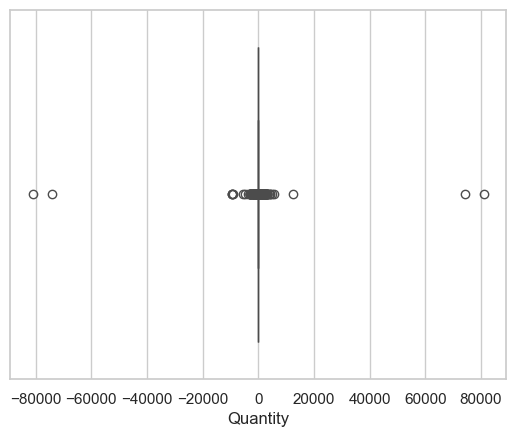

In [35]:
sns.boxplot(x=df['Quantity'])

Text(0.5, 1.0, 'Distribution of Quantity')

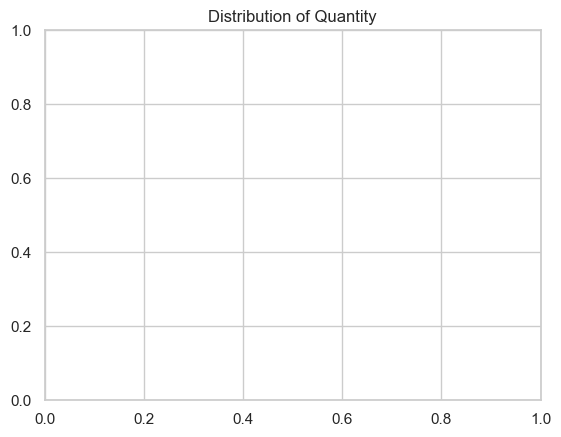

In [36]:
plt.title("Distribution of Quantity")

In [37]:
plt.show()

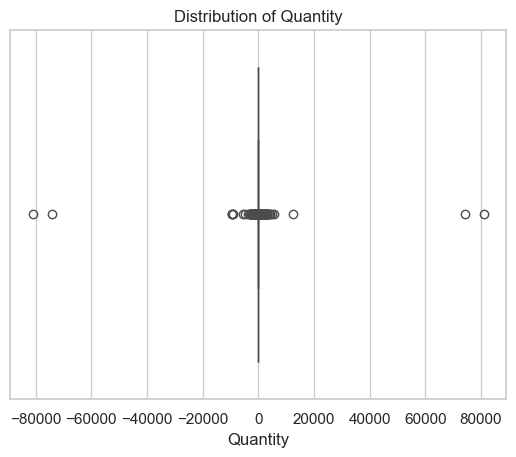

In [38]:
sns.boxplot(x=df['Quantity'])
plt.title("Distribution of Quantity")
plt.show()

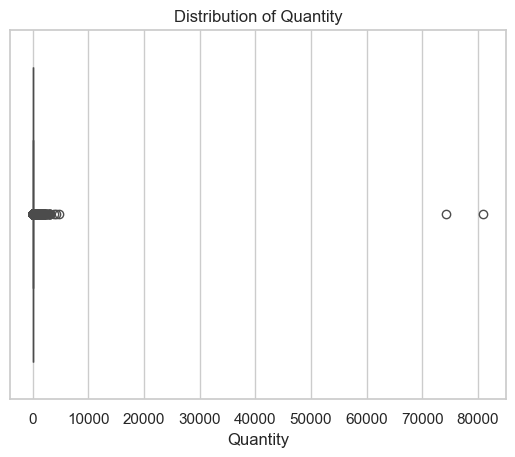

In [39]:
sns.boxplot(x=df_cleaned['Quantity'])
plt.title("Distribution of Quantity")
plt.show()

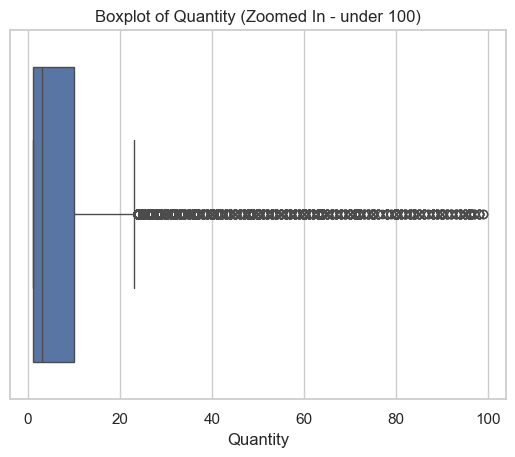

In [40]:
sns.boxplot(x=df_cleaned[df_cleaned['Quantity'] < 100]['Quantity'])
plt.title("Boxplot of Quantity (Zoomed In - under 100)")
plt.show()

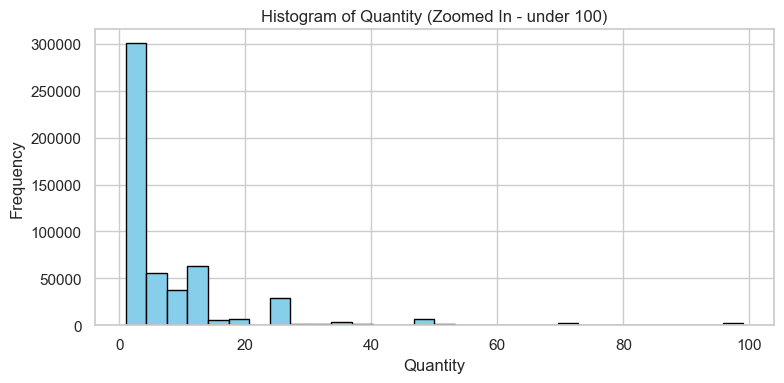

In [41]:
# Histogram to show Quantity Distribution (Zoomed In)
df_zoom = df_cleaned[df_cleaned['Quantity'] < 100]
plt.figure(figsize=(8, 4))
plt.hist(df_zoom['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity (Zoomed In - under 100)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [42]:
# check total revenue
print("Total Revenue:", round(df_cleaned['TotalPrice'].sum(), 2))

Total Revenue: 10642110.8


In [43]:
# check average trnx value
print("Average Transaction Value:", round(df_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2))

Average Transaction Value: 533.17


In [44]:
# check number of unique customers
print("Number of Unique Customers:", df_cleaned['CustomerID'].nunique())


Number of Unique Customers: 4338


In [45]:
# check Descriptive stats summary

In [46]:
summary_stats = pd.DataFrame({
    "Total Revenue (£)": [round(df_cleaned['TotalPrice'].sum(), 2)],
    "Average Transaction Value (£)": [round(df_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)],
    "Unique Customers": [df_cleaned['CustomerID'].nunique()],
    "Start Date": [df_cleaned['InvoiceDate'].min().strftime("%Y-%m-%d")],
    "End Date": [df_cleaned['InvoiceDate'].max().strftime("%Y-%m-%d")]
})

In [47]:
summary_stats = pd.DataFrame({
    "Total Revenue (£)": [round(df_cleaned['TotalPrice'].sum(), 2)],
    "Average Transaction Value (£)": [round(df_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)],
    "Unique Customers": [df_cleaned['CustomerID'].nunique()],
    "Start Date": [df_cleaned['InvoiceDate'].min().strftime("%Y-%m-%d")],
    "End Date": [df_cleaned['InvoiceDate'].max().strftime("%Y-%m-%d")]
})
display(summary_stats)

,Total Revenue (£),Average Transaction Value (£),Unique Customers,Start Date,End Date
0,10642110.8,533.17,4338,2010-12-01,2011-12-09


In [48]:
# apply English date format

In [49]:
summary_stats = pd.DataFrame({
    "Total Revenue (£)": [round(df_cleaned['TotalPrice'].sum(), 2)],
    "Average Transaction Value (£)": [round(df_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)],
    "Unique Customers": [df_cleaned['CustomerID'].nunique()],
    "Start Date": [df_cleaned['InvoiceDate'].min().strftime("%d %B %Y")],
    "End Date": [df_cleaned['InvoiceDate'].max().strftime("%d %B %Y")]
})
display(summary_stats)

,Total Revenue (£),Average Transaction Value (£),Unique Customers,Start Date,End Date
0,10642110.8,533.17,4338,01 December 2010,09 December 2011


In [50]:
# change date format in dd mmm yyyy format

summary_stats = pd.DataFrame({
    "Total Revenue (£)": [round(df_cleaned['TotalPrice'].sum(), 2)],
    "Average Transaction Value (£)": [round(df_cleaned.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)],
    "Unique Customers": [df_cleaned['CustomerID'].nunique()],
    "Start Date": [df_cleaned['InvoiceDate'].min().strftime("%d %b %Y")],
    "End Date": [df_cleaned['InvoiceDate'].max().strftime("%d %b %Y")]
})
display(summary_stats)

,Total Revenue (£),Average Transaction Value (£),Unique Customers,Start Date,End Date
0,10642110.8,533.17,4338,01 Dec 2010,09 Dec 2011


In [51]:
# the sales period  start date from 01 Dec 2010 to 01 Dec 2011 only to make it 12months

In [52]:
filtered_df = df_cleaned[(df_cleaned['InvoiceDate'] >= '2010-12-01') & (df_cleaned['InvoiceDate'] <= '2011-12-01')]
summary_stats = pd.DataFrame({
    "Total Revenue (£)": [round(filtered_df['TotalPrice'].sum(), 2)],
    "Average Transaction Value (£)": [round(filtered_df.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)],
    "Unique Customers": [filtered_df['CustomerID'].nunique()],
    "Start Date": ["01 Dec 2010"],
    "End Date": ["01 Dec 2011"]
})
display(summary_stats)

,Total Revenue (£),Average Transaction Value (£),Unique Customers,Start Date,End Date
0,10004320.47,522.66,4297,01 Dec 2010,01 Dec 2011


In [53]:
# sales period from 02 Dec 2011 - 09 Dec 2011
filtered_df = df_cleaned[(df_cleaned['InvoiceDate'] >= '2011-12-02') & (df_cleaned['InvoiceDate'] <= '2011-12-09')]
summary_stats = pd.DataFrame({
    "Total Revenue (£)": [round(filtered_df['TotalPrice'].sum(), 2)],
    "Average Transaction Value (£)": [round(filtered_df.groupby('InvoiceNo')['TotalPrice'].sum().mean(), 2)],
    "Unique Customers": [filtered_df['CustomerID'].nunique()],
    "Start Date": ["02 Dec 2011"],
    "End Date": ["09 Dec 2011"]
})
display(summary_stats)

,Total Revenue (£),Average Transaction Value (£),Unique Customers,Start Date,End Date
0,384820.72,588.41,510,02 Dec 2011,09 Dec 2011


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\1139185246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M').astype(str)


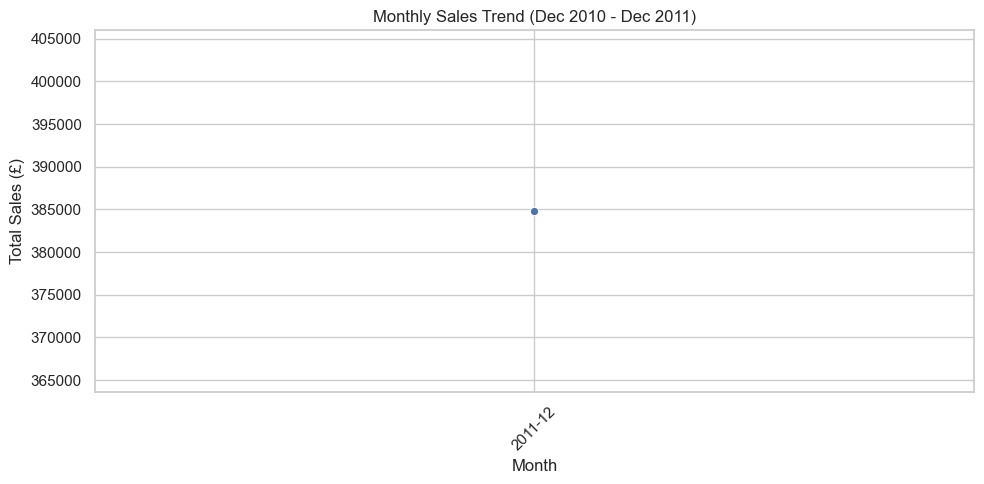

In [54]:
# Monthly sales trend over time
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o')
plt.title('Monthly Sales Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3157074079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M').astype(str)


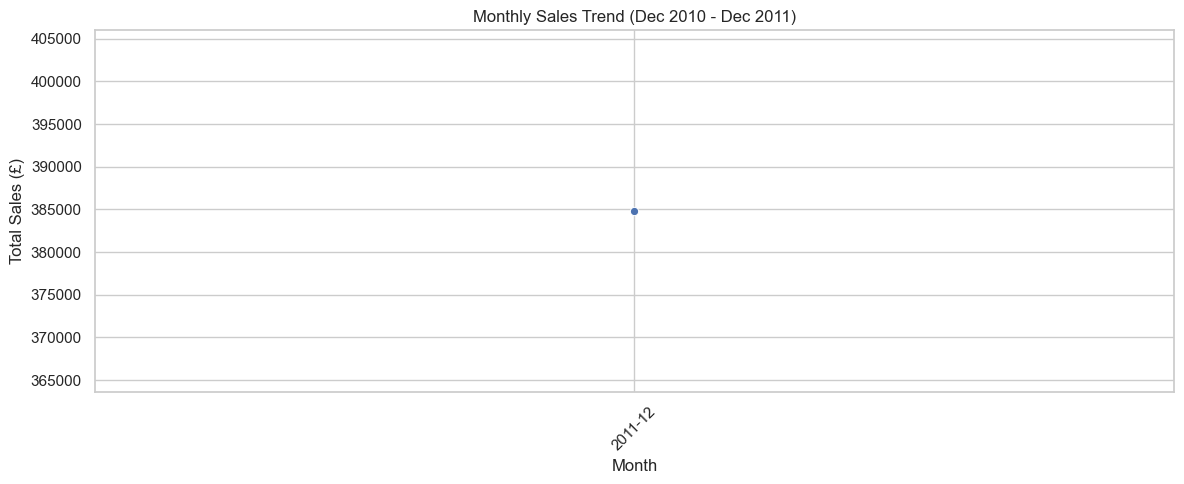

In [55]:
# Monthly sales trend over time
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3157074079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M').astype(str)


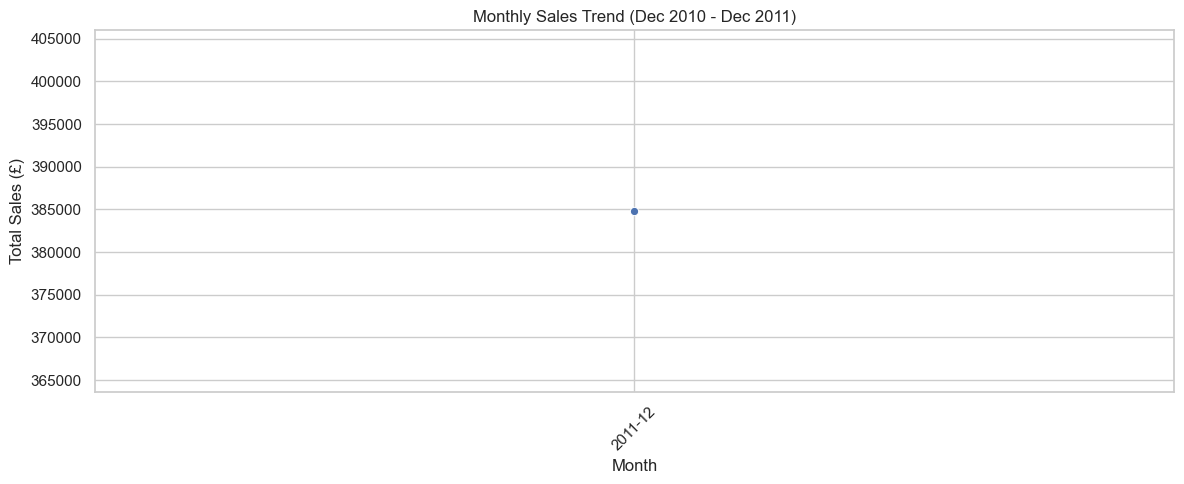

In [56]:
# Monthly sales trend over time
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
# Monthly sales trend over time
filtered_df = df_cleaned[(df_cleaned['InvoiceDate'] >= '2010-12-01') & (df_cleaned['InvoiceDate'] <= '2011-12-01')].copy()
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M')
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£plt.ylabel('Total Sales (\xa3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3285306875.py, line 11)

In [ ]:
# Monthly sales trend over time
filtered_df = df_cleaned[(df_cleaned['InvoiceDate'] >= '2010-12-01') & (df_cleaned['InvoiceDate'] <= '2011-12-01')].copy()
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M')
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£plt.ylabel('Total Sales (\xa3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1955344761.py, line 11)

In [60]:
# Monthly sales trend over time
filtered_df = df_cleaned[(df_cleaned['InvoiceDate'] >= '2010-12-01') & (df_cleaned['InvoiceDate'] <= '2011-12-01')].copy()
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M')
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£plt.ylabel('Total Sales (\xa3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3285306875.py, line 11)

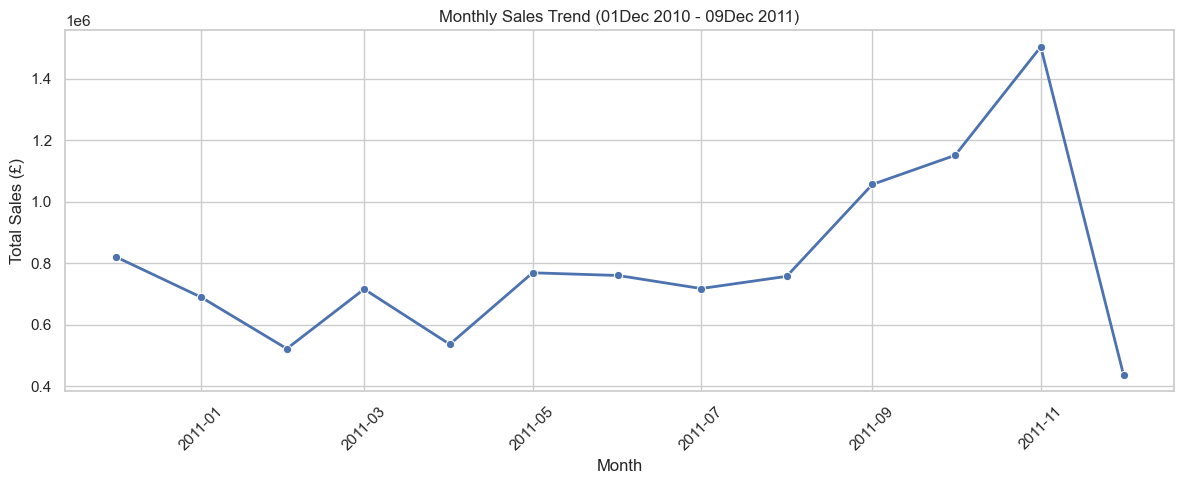

In [63]:
# Monthly sales trend over time
filtered_df = df_cleaned[(df_cleaned['InvoiceDate'] >= '2010-12-01') & (df_cleaned['InvoiceDate'] <= '2011-12-09')].copy()
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M')
monthly_sales = filtered_df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (01Dec 2010 - 09Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

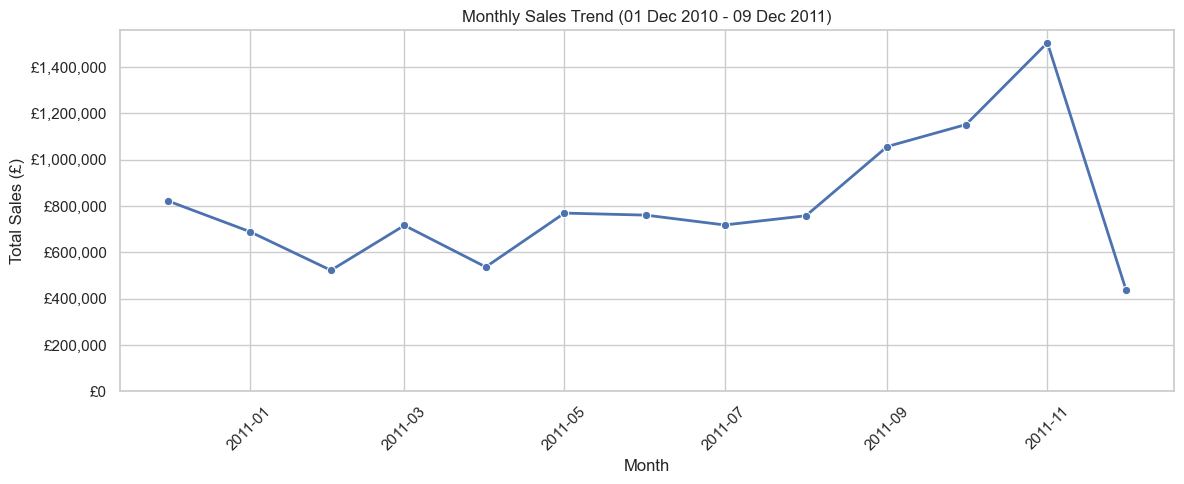

In [66]:
from matplotlib.ticker import FuncFormatter

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{int(x):,}'

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (01 Dec 2010 - 09 Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

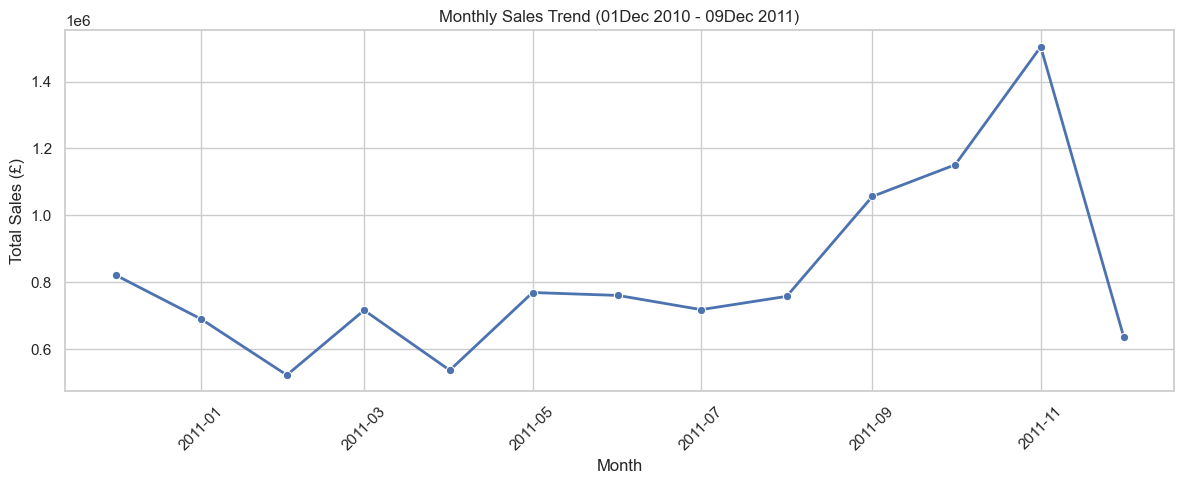

In [67]:
# Monthly sales trend over time (full date range)
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend ({0} - {1})'.format(
    df_cleaned['InvoiceDate'].min().strftime('%d%b %Y'),
    df_cleaned['InvoiceDate'].max().strftime('%d%b %Y')))
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plot' is not defined

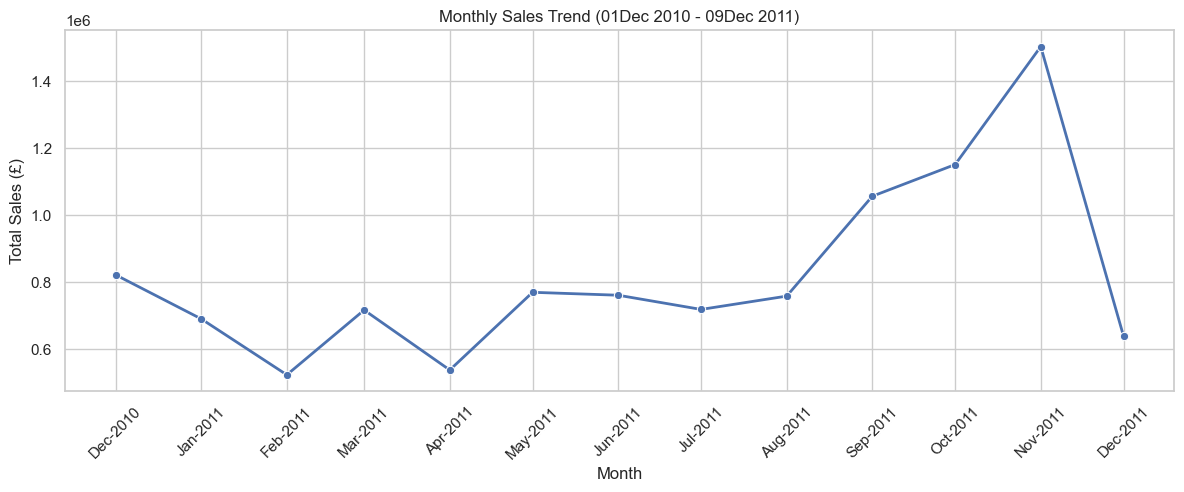

In [68]:
# Monthly sales trend over time (full date range)
import matplotlib.dates as mdates
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend ({0} - {1})'.format(
    df_cleaned['InvoiceDate'].min().strftime('%d%b %Y'),
    df_cleaned['InvoiceDate'].max().strftime('%d%b %Y')))
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plot.show()

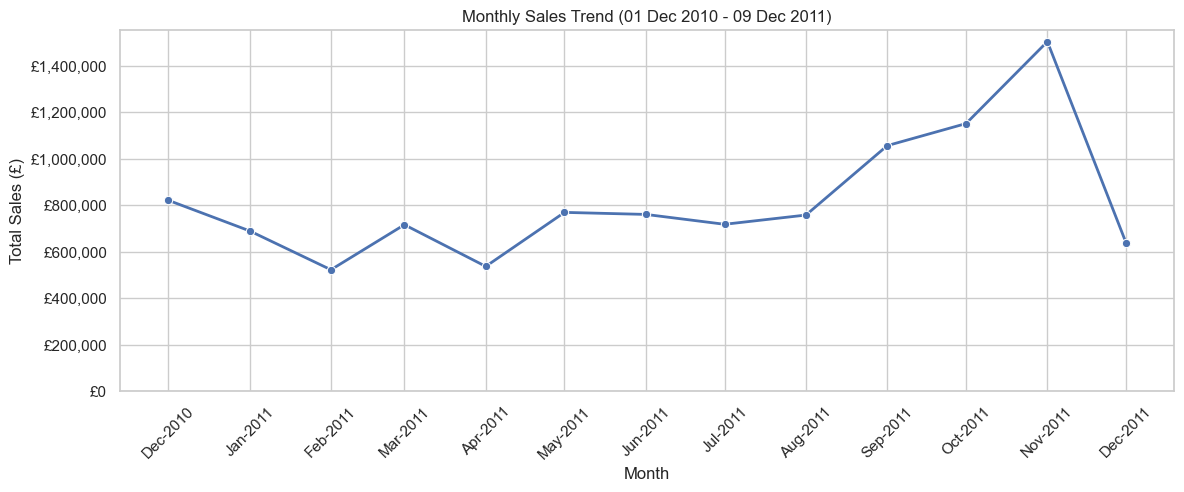

In [ ]:
# Monthly sales trend over time (full date range)
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Format y-axis as currency
def currency_formatter(x, pos):
    return f'£{int(x):,}'

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', linewidth=2)
plt.title('Monthly Sales Trend (01 Dec 2010 - 09 Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.show()

In [72]:
# Customer Segmentation by Behaviour (RFM)
# RFM (Recency, Frequency, Monetary) Analysis
# Aggregate metrics

snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [73]:
# Score each customer (1 = worst, 4 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1).astype(int)

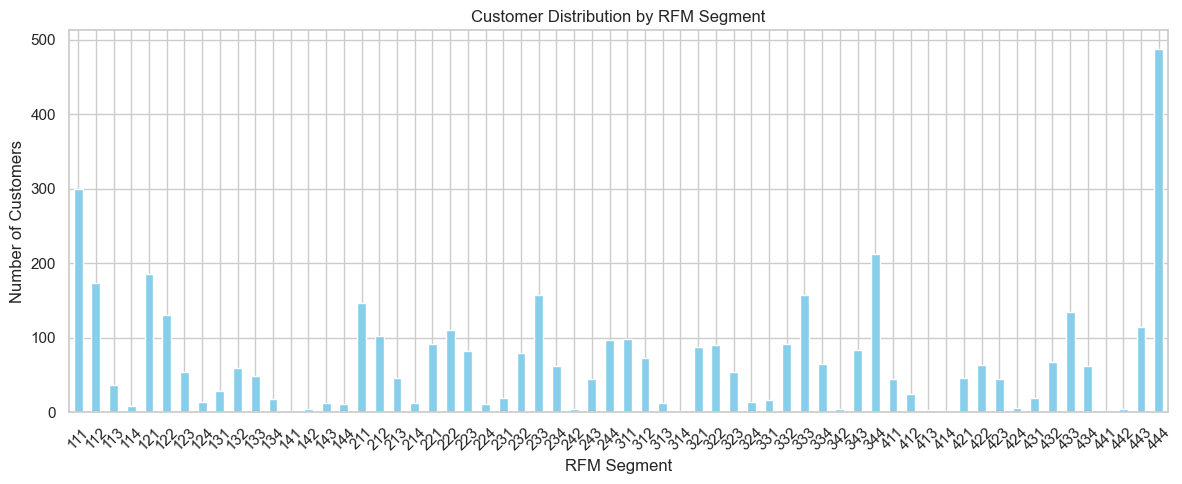

In [74]:
# Distribution of RFM segments
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(12,5))
rfm_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

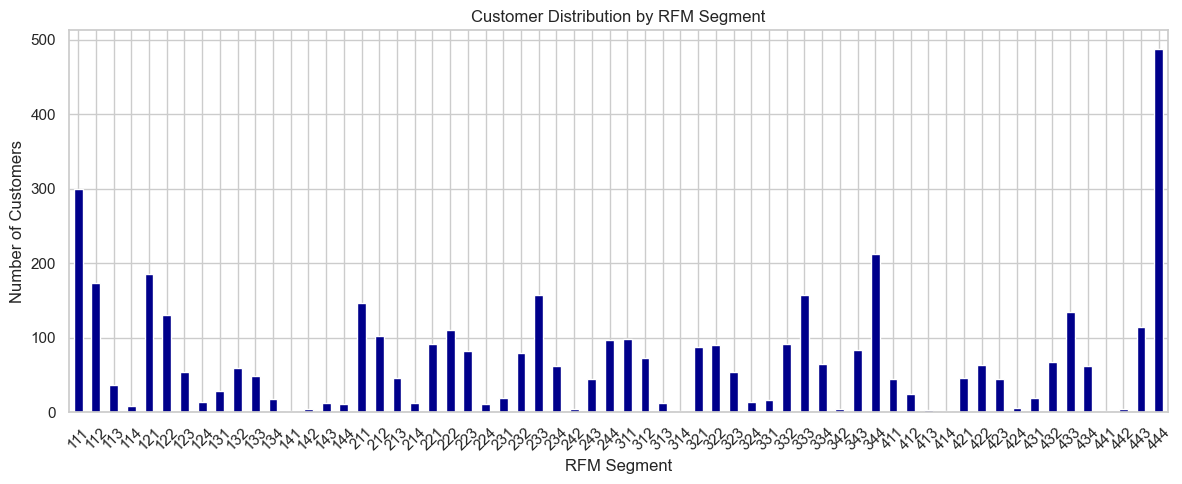

In [75]:
# Distribution of RFM segments
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(12,5))
rfm_segment_counts.plot(kind='bar', color='darkblue')
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# Aggregate metrics
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [77]:
# Score each customer (1 = worst, 4 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1).astype(int)

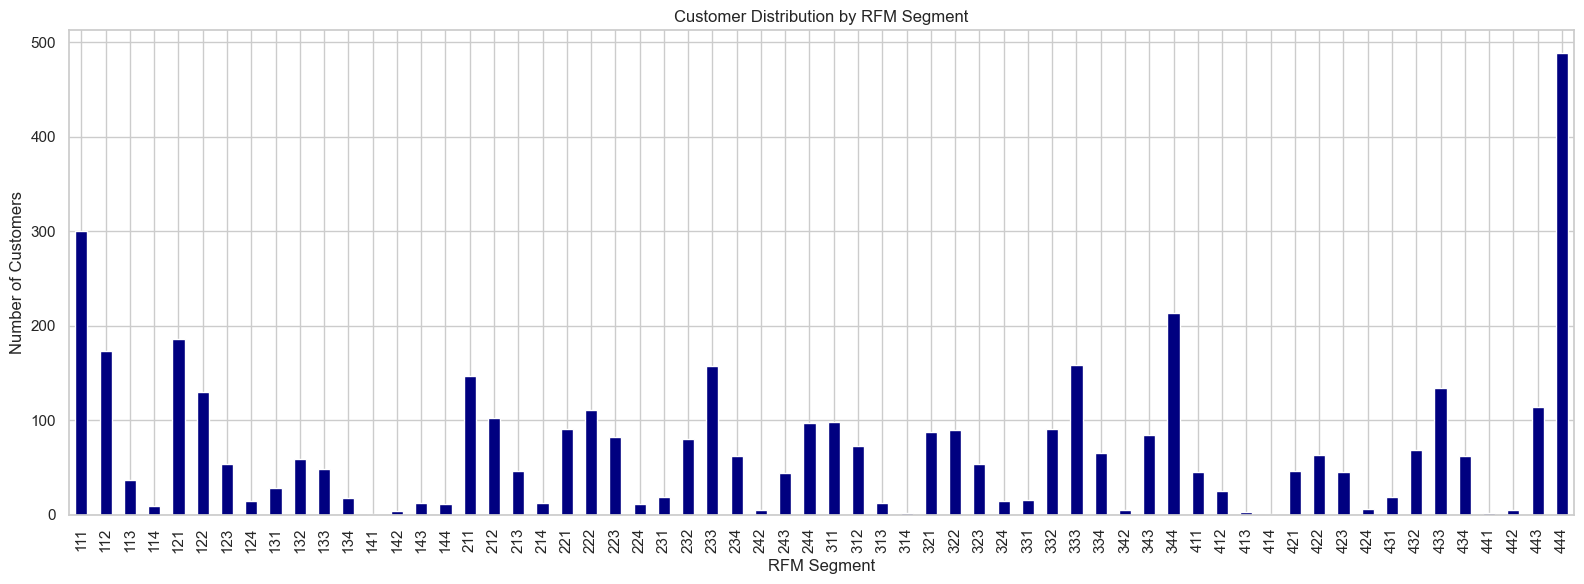

In [78]:
# Distribution of RFM segments
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(16,6))
rfm_segment_counts.plot(kind='bar', color='navy')
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [82]:
df_cleaned['CustomerID'].nunique()


4338

In [83]:
rfm['RFM_Segment'].value_counts().sum()

np.int64(4338)

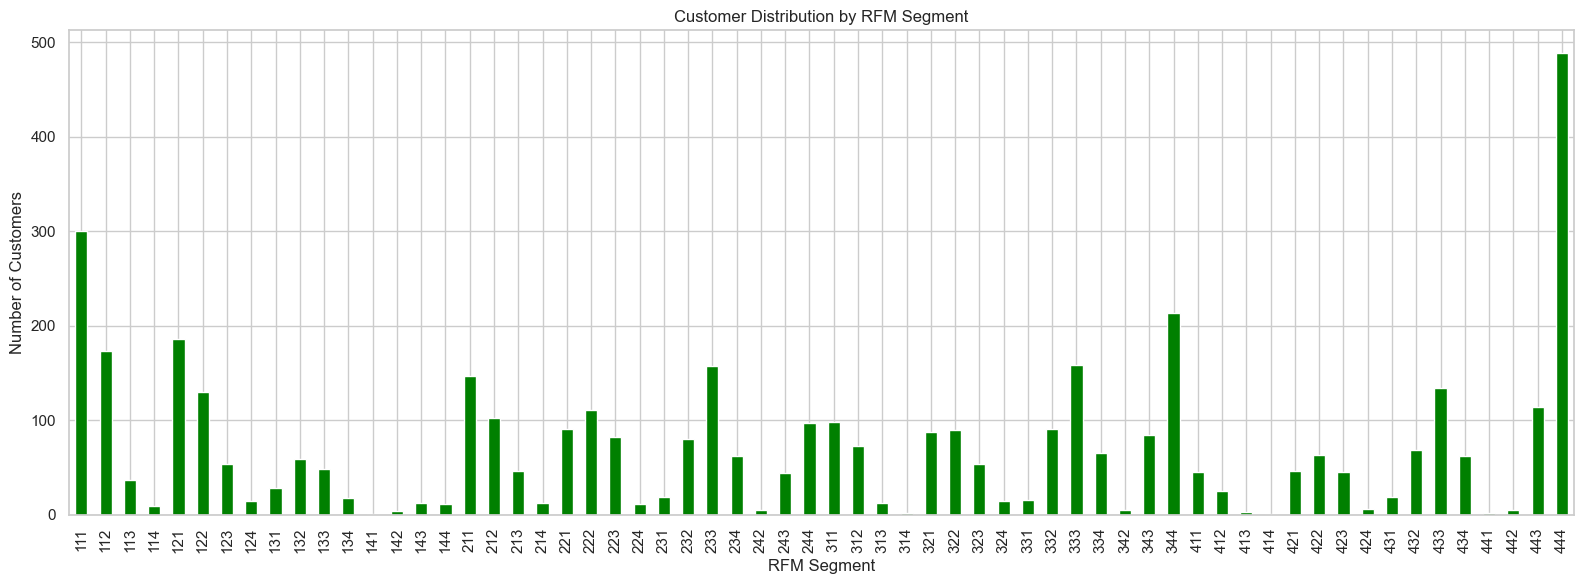

In [84]:
# Distribution of RFM segments
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(16,6))
rfm_segment_counts.plot(kind='bar', color='green')
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [85]:
# Aggregate metrics
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [86]:
# Score each customer (1 = worst, 4 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1).astype(int)


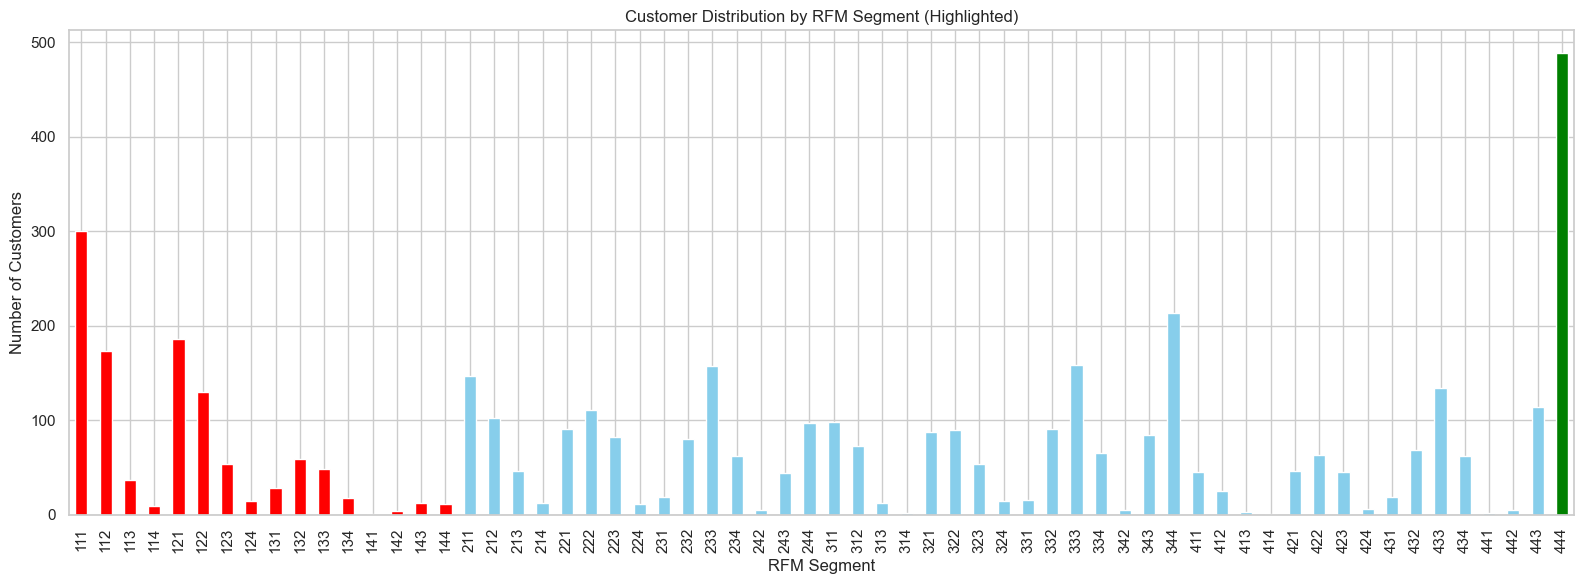

In [87]:
# Define color mapping
colors = rfm['RFM_Segment'].apply(
    lambda x: 'red' if x.startswith('1') else ('green' if x == '444' else 'skyblue')
)

# Plot RFM Segment Distribution with color
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(16,6))
rfm_segment_counts.plot(
    kind='bar',
    color=[
        'red' if seg.startswith('1') else 'green' if seg == '444' else 'skyblue'
        for seg in rfm_segment_counts.index
    ]
)
plt.title('Customer Distribution by RFM Segment (Highlighted)')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [88]:
# Aggregate metrics
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [89]:
# Score each customer (1 = worst, 4 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1).astype(int)

In [90]:
### Visualising RFM Segments
```python
# Define color mapping
colors = rfm['RFM_Segment'].apply(
    lambda x: 'red' if x.startswith('1') else ('green' if x == '444' else 'skyblue')
)

# Plot RFM Segment Distribution with color
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(16,6))
rfm_segment_counts.plot(
    kind='bar',
    color=[
        'red' if seg.startswith('1') else 'green' if seg == '444' else 'skyblue'
        for seg in rfm_segment_counts.index
    ]
)
plt.title('Customer Distribution by RFM Segment (Highlighted)')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2409225713.py, line 2)

In [91]:
# Define color mapping
colors = rfm['RFM_Segment'].apply(
    lambda x: 'red' if x.startswith('1') else ('green' if x == '444' else 'skyblue')
)

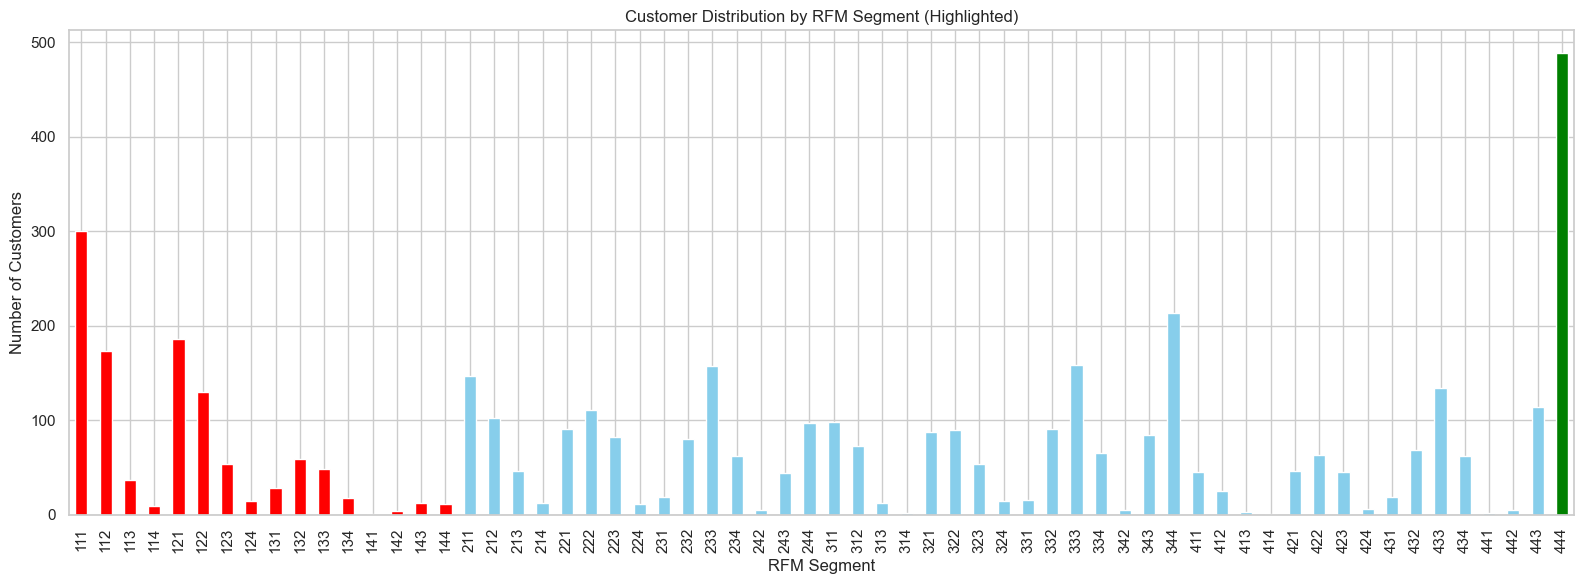

In [92]:
# Plot RFM Segment Distribution with color
rfm_segment_counts = rfm['RFM_Segment'].value_counts().sort_index()
plt.figure(figsize=(16,6))
rfm_segment_counts.plot(
    kind='bar',
    color=[
        'red' if seg.startswith('1') else 'green' if seg == '444' else 'skyblue'
        for seg in rfm_segment_counts.index
    ]
)
plt.title('Customer Distribution by RFM Segment (Highlighted)')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [95]:
rfm['SegmentGroup'] = rfm['RFM_Segment'].apply(
    lambda x: 'High-Value' if x == '444' else
              'At-Risk' if x[0] == '1' else
              'Moderate'
)


In [93]:
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1).astype(int)


In [94]:
at_risk_count = rfm[rfm['R'] == '1'].shape[0]
high_value_count = rfm[rfm['RFM_Segment'] == '444'].shape[0]
moderate_count = rfm[(rfm['R'] != '1') & (rfm['RFM_Segment'] != '444')].shape[0]
total_customers = rfm.shape[0]

print("At-Risk Customers:", at_risk_count)
print("High-Value Customers:", high_value_count)
print("Moderate Customers:", moderate_count)
print("Total Unique Customers:", total_customers)


At-Risk Customers: 0
High-Value Customers: 488
Moderate Customers: 3850
Total Unique Customers: 4338


In [96]:
print("At-Risk Customers:", (rfm['SegmentGroup'] == 'At-Risk').sum())


At-Risk Customers: 1084


In [97]:
# Define segment groups
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

segment_counts = rfm['RFM_Segment'].value_counts()

# Group definitions
at_risk = rfm[rfm['RFM_Segment'].str.startswith('1')]
high_value = rfm[rfm['RFM_Segment'] == '444']
moderate = rfm[~rfm.index.isin(at_risk.index.union(high_value.index))]


In [98]:
colors = ['red' if x.startswith('1') else 'green' if x == '444' else 'skyblue' for x in segment_counts.index]


In [99]:
# Sum counts from the chart color logic
at_risk_count = sum([v for k, v in segment_counts.items() if k.startswith('1')])
high_value_count = segment_counts.get('444', 0)
moderate_count = sum(segment_counts.values()) - at_risk_count - high_value_count
total_customers = at_risk_count + high_value_count + moderate_count

print("At-Risk Customers:", at_risk_count)
print("High-Value Customers:", high_value_count)
print("Moderate Customers:", moderate_count)
print("Total Unique Customers:", total_customers)


TypeError: 'numpy.ndarray' object is not callable

In [100]:
# Ensure no conflict with built-in sum
import builtins

at_risk_count = builtins.sum([v for k, v in segment_counts.items() if k.startswith('1')])
high_value_count = segment_counts.get('444', 0)
moderate_count = builtins.sum(segment_counts.values()) - at_risk_count - high_value_count
total_customers = at_risk_count + high_value_count + moderate_count

print("At-Risk Customers:", at_risk_count)
print("High-Value Customers:", high_value_count)
print("Moderate Customers:", moderate_count)
print("Total Unique Customers:", total_customers)


TypeError: 'numpy.ndarray' object is not callable

In [101]:
moderate_count = sum(segment_counts.values) - at_risk_count - high_value_count


In [102]:
# Count how many customers fall into each visual group based on segment
segment_counts = rfm['RFM_Segment'].value_counts()

# Count customers whose Recency score starts with '1' (e.g. 111, 123)
at_risk_count = sum([v for k, v in segment_counts.items() if str(k).startswith('1')])

# Count customers who are in the exact '444' segment
high_value_count = segment_counts.get('444', 0)

# All other segments are moderate
moderate_count = segment_counts.sum() - at_risk_count - high_value_count

# Total customers
total_customers = segment_counts.sum()

# Display results
print("At-Risk Customers:", at_risk_count)
print("High-Value Customers:", high_value_count)
print("Moderate Customers:", moderate_count)
print("Total Unique Customers:", total_customers)


At-Risk Customers: 1084
High-Value Customers: 488
Moderate Customers: 2766
Total Unique Customers: 4338


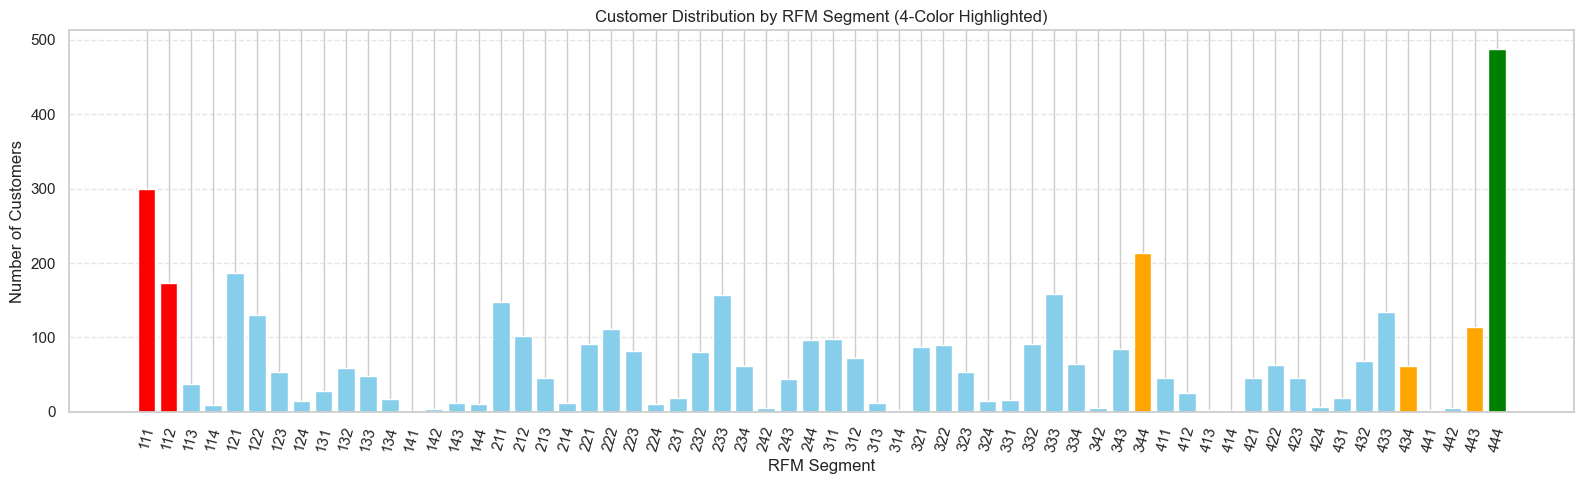

In [103]:
import matplotlib.pyplot as plt

# Count RFM segments
segment_counts = rfm['RFM_Segment'].value_counts().sort_index()

# Define custom colors for each segment group
def get_segment_color(segment):
    if segment == '444':
        return 'green'  # High Value
    elif segment in ['111', '112']:
        return 'red'    # At Risk
    elif segment in ['344', '434', '443']:
        return 'orange' # High Value, Less Recent
    else:
        return 'skyblue'  # Moderate

colors = [get_segment_color(seg) for seg in segment_counts.index.astype(str)]

# Plot
plt.figure(figsize=(16, 5))
plt.bar(segment_counts.index, segment_counts.values, color=colors)
plt.title('Customer Distribution by RFM Segment (4-Color Highlighted)')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [104]:
# Define RFM group logic using R, F, M thresholds
at_risk_mask = (rfm['R_Score'] == 1) & (rfm['F_Score'] <= 2) & (rfm['M_Score'] <= 2)
high_value_mask = (rfm['R_Score'] == 4) & (rfm['F_Score'] == 4) & (rfm['M_Score'] == 4)
less_recent_high_mask = (rfm['R_Score'] <= 3) & (rfm['F_Score'] >= 3) & (rfm['M_Score'] >= 3)
moderate_mask = ~(at_risk_mask | high_value_mask | less_recent_high_mask)

KeyError: 'R_Score'

In [105]:
# Ensure R, F, M scores are computed
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)


In [106]:
# Define RFM group logic using R, F, M thresholds
at_risk_mask = (rfm['R_Score'] == 1) & (rfm['F_Score'] <= 2) & (rfm['M_Score'] <= 2)
high_value_mask = (rfm['R_Score'] == 4) & (rfm['F_Score'] == 4) & (rfm['M_Score'] == 4)
less_recent_high_mask = (rfm['R_Score'] <= 3) & (rfm['F_Score'] >= 3) & (rfm['M_Score'] >= 3)
moderate_mask = ~(at_risk_mask | high_value_mask | less_recent_high_mask)

In [107]:
# Count customers in each group
at_risk_count = rfm[at_risk_mask].shape[0]
high_value_count = rfm[high_value_mask].shape[0]
less_recent_high_count = rfm[less_recent_high_mask].shape[0]
moderate_count = rfm[moderate_mask].shape[0]
total_customers = rfm.shape[0]

In [108]:
print("At-Risk Customers:", at_risk_count)
print("High-Value Customers:", high_value_count)
print("High-Value (Less Recent):", less_recent_high_count)
print("Moderate Customers:", moderate_count)
print("Total Unique Customers:", total_customers)

At-Risk Customers: 789
High-Value Customers: 488
High-Value (Less Recent): 969
Moderate Customers: 2092
Total Unique Customers: 4338


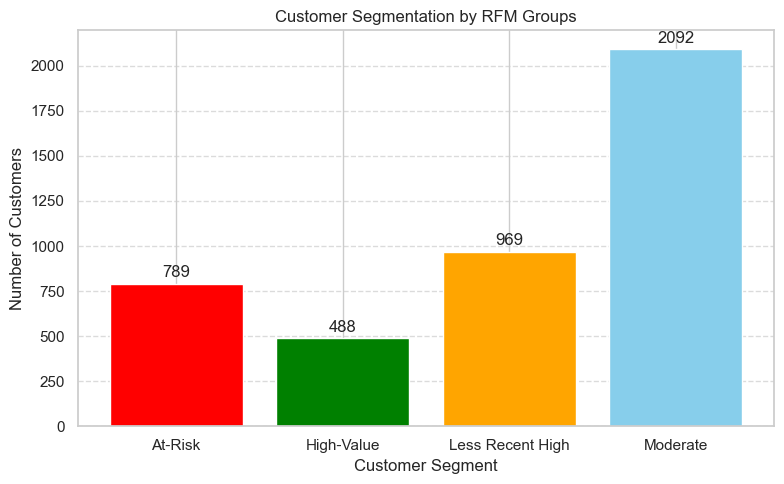

In [109]:
import matplotlib.pyplot as plt

# Create a dictionary of segment labels and their counts
segment_counts = {
    'At-Risk': at_risk_count,
    'High-Value': high_value_count,
    'Less Recent High': less_recent_high_count,
    'Moderate': moderate_count
}

# Assign consistent colours to each group
segment_colours = {
    'At-Risk': 'red',
    'High-Value': 'green',
    'Less Recent High': 'orange',
    'Moderate': 'skyblue'
}

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(segment_counts.keys(), segment_counts.values(),
               color=[segment_colours[segment] for segment in segment_counts.keys()])

# Add labels and title
plt.title('Customer Segmentation by RFM Groups')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


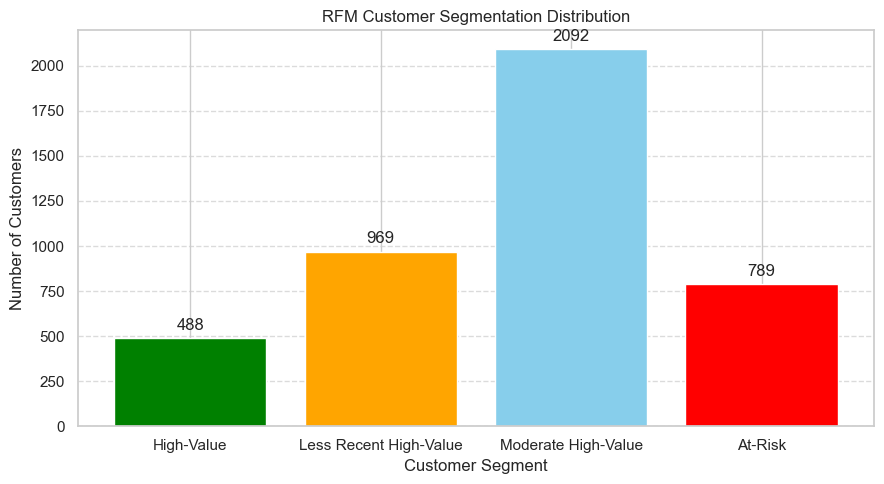

In [110]:
import matplotlib.pyplot as plt

# Updated customer segment counts with new labels and desired order
segment_counts_ordered = {
    'High-Value': high_value_count,
    'Less Recent High-Value': less_recent_high_count,
    'Moderate High-Value': moderate_count,
    'At-Risk': at_risk_count
}

# Assign specific colours to match the interpretation
segment_colours = {
    'High-Value': 'green',
    'Less Recent High-Value': 'orange',
    'Moderate High-Value': 'skyblue',
    'At-Risk': 'red'
}

# Plotting
plt.figure(figsize=(9, 5))
bars = plt.bar(
    segment_counts_ordered.keys(),
    segment_counts_ordered.values(),
    color=[segment_colours[label] for label in segment_counts_ordered.keys()]
)

# Add labels and annotations
plt.title('RFM Customer Segmentation Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 30, f'{yval}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [111]:
# Calculate percentages for labels
segment_counts_ordered = {
    'High-Value': (high_value_count, round(high_value_count / total_customers * 100, 1)),
    'Less Recent High-Value': (less_recent_high_count, round(less_recent_high_count / total_customers * 100, 1)),
    'Moderate High-Value': (moderate_count, round(moderate_count / total_customers * 100, 1)),
    'At-Risk': (at_risk_count, round(at_risk_count / total_customers * 100, 1))

SyntaxError: incomplete input (3816305613.py, line 6)

In [113]:
# Total customers
total_customers = 4338

# Manual segment counts based on your verified output
high_value_count = 488
less_recent_high_count = 969
moderate_count = 2092
at_risk_count = 789

# Corrected dictionary with percentage in brackets
segment_counts_ordered = {
    'High-Value': (high_value_count, round(high_value_count / total_customers * 100, 2)),
    'Less Recent High-Value': (less_recent_high_count, round(less_recent_high_count / total_customers * 100, 2)),
    'Moderate High-Value': (moderate_count, round(moderate_count / total_customers * 100, 2)),
    'At-Risk': (at_risk_count, round(at_risk_count / total_customers * 100, 2))
}

# Review Output
for segment, (count, pct) in segment_counts_ordered.items():
    print(f"{segment}: {count} customers ({pct}%)")


High-Value: 488 customers (11.25%)
Less Recent High-Value: 969 customers (22.34%)
Moderate High-Value: 2092 customers (48.22%)
At-Risk: 789 customers (18.19%)


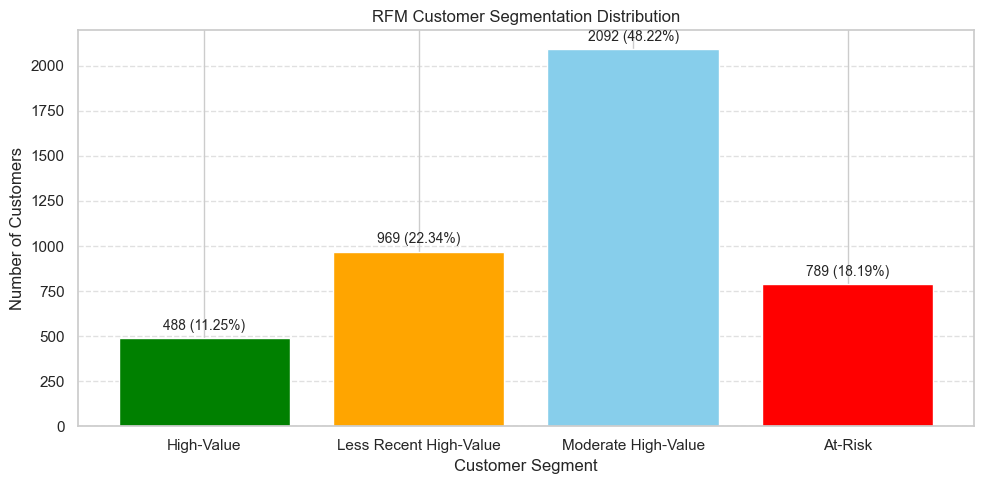

In [114]:
# RFM Segment Distribution Bar Chart (4-colour with percentages)
import matplotlib.pyplot as plt

# Define colours for each RFM group
segment_colours = {
    'High-Value': 'green',
    'Less Recent High-Value': 'orange',
    'Moderate High-Value': 'skyblue',
    'At-Risk': 'red'
}

# Use accurate counts from earlier
segment_counts_ordered = {
    'High-Value': (488, round(488 / 4338 * 100, 2)),
    'Less Recent High-Value': (969, round(969 / 4338 * 100, 2)),
    'Moderate High-Value': (2092, round(2092 / 4338 * 100, 2)),
    'At-Risk': (789, round(789 / 4338 * 100, 2))
}

# Plot the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(
    segment_counts_ordered.keys(),
    [v[0] for v in segment_counts_ordered.values()],
    color=[segment_colours[label] for label in segment_counts_ordered.keys()]
)

plt.title('RFM Customer Segmentation Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add text labels with count and percentage
for bar, (count, pct) in zip(bars, segment_counts_ordered.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        count + 30,
        f'{count} ({pct}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

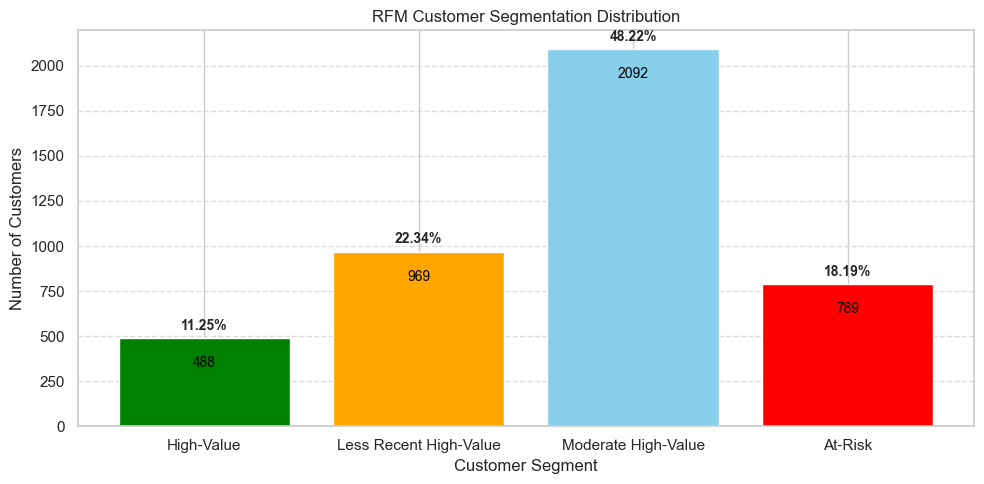

In [116]:
import matplotlib.pyplot as plt

# Set consistent segment order and colours
segment_counts_ordered = {
    'High-Value': (high_value_count, round(high_value_count / total_customers * 100, 2)),
    'Less Recent High-Value': (less_recent_high_count, round(less_recent_high_count / total_customers * 100, 2)),
    'Moderate High-Value': (moderate_count, round(moderate_count / total_customers * 100, 2)),
    'At-Risk': (at_risk_count, round(at_risk_count / total_customers * 100, 2))
}

segment_colours = {
    'High-Value': 'green',
    'Less Recent High-Value': 'orange',
    'Moderate High-Value': 'skyblue',
    'At-Risk': 'red'
}

# Create the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(
    segment_counts_ordered.keys(),
    [v[0] for v in segment_counts_ordered.values()],
    color=[segment_colours[k] for k in segment_counts_ordered.keys()]
)

# Add count inside each bar, and % above each bar
for bar, (count, pct) in zip(bars, segment_counts_ordered.values()):
    plt.text(bar.get_x() + bar.get_width()/2, count - 100, f'{count}', ha='center', va='top', fontsize=10, color='black')  # Inside bar
    plt.text(bar.get_x() + bar.get_width()/2, count + 30, f'{pct}%', ha='center', va='bottom', fontsize=10, fontweight='bold')  # Above bar

# Chart styling
plt.title('RFM Customer Segmentation Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [117]:
# top 10 products analysis by Total Sales

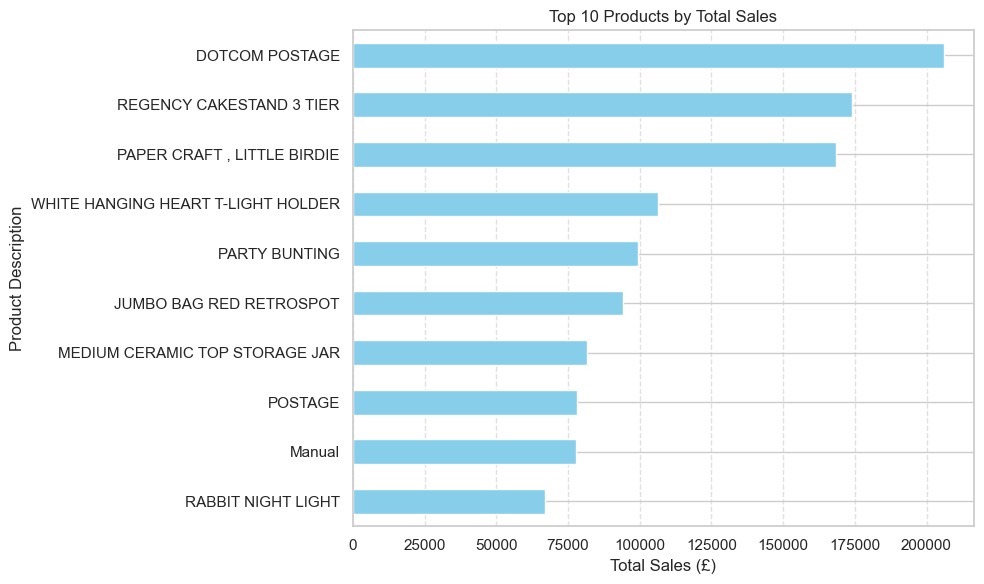

In [118]:
top_products = df_cleaned.groupby('Description')['TotalPrice'].sum().nlargest(10).sort_values()
top_products.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\886716458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_unit_price, x='UnitPrice', y='Description', palette='mako')


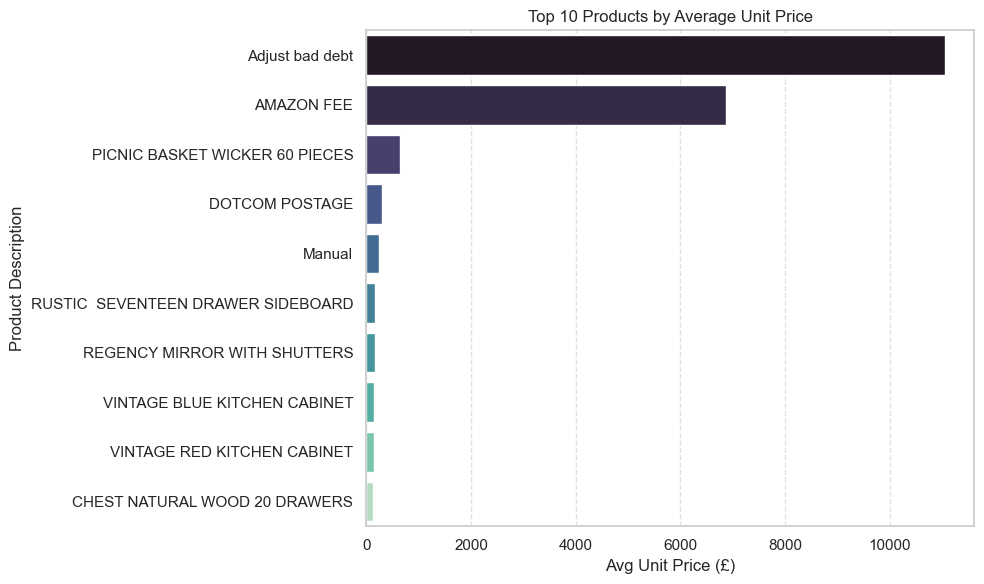

In [119]:
top_unit_price = df_cleaned.groupby('Description')['UnitPrice'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_unit_price, x='UnitPrice', y='Description', palette='mako')
plt.title('Top 10 Products by Average Unit Price')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\2570321733.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_price, x='UnitPrice', y='Description', palette='mako')


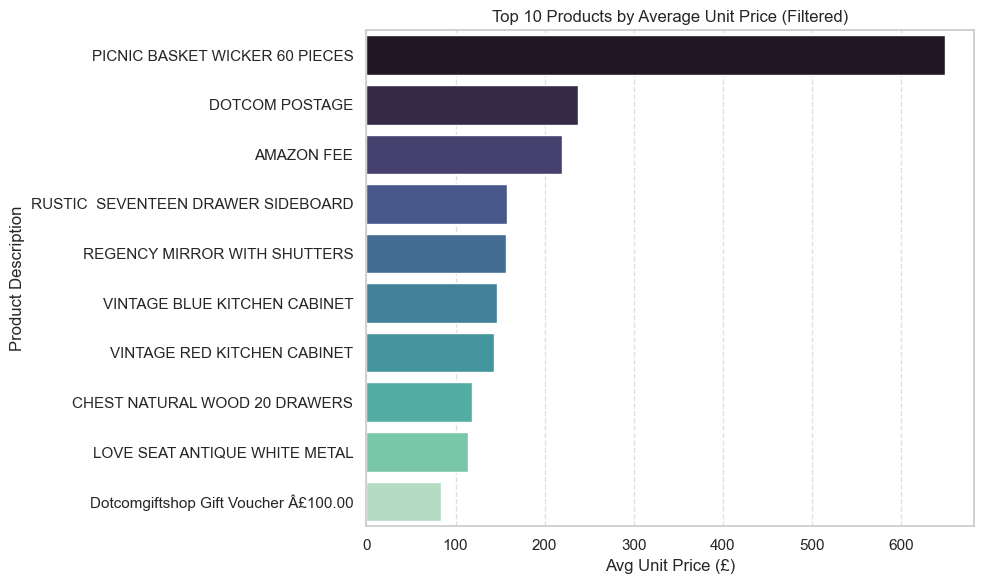

In [120]:
# Step 1: Remove extreme outliers in UnitPrice
filtered_price_df = df_cleaned[df_cleaned['UnitPrice'] < 1000]  # adjust threshold if needed

# Step 2: Group and plot top 10 products by average unit price
top_avg_price = (
    filtered_price_df.groupby('Description')['UnitPrice']
    .mean()
    .nlargest(10)
    .reset_index()
)

# Step 3: Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_avg_price, x='UnitPrice', y='Description', palette='mako')
plt.title('Top 10 Products by Average Unit Price (Filtered)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\851903181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products_only['Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)
C:\Users\selin\AppData\Local\Temp\ipykernel_18576\851903181.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_price_products, x='UnitPrice', y='Description', palette='mako')


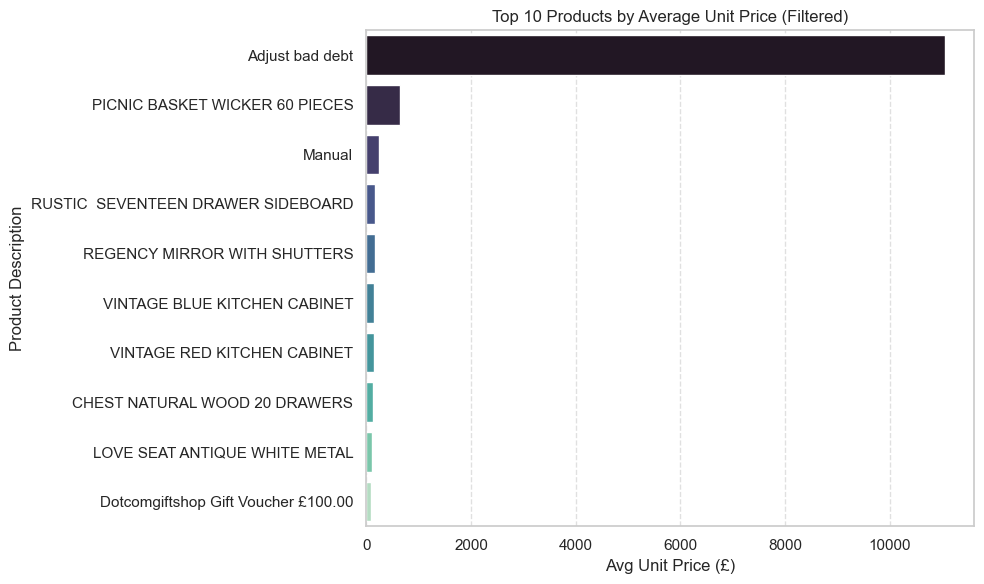

In [121]:
# Step 1: Filter out irrelevant service-type items
non_product_keywords = ['FEE', 'POSTAGE', 'CARRIAGE']
df_products_only = df_cleaned[~df_cleaned['Description'].str.contains('|'.join(non_product_keywords), case=False, na=False)]

# Step 2: Fix character encoding issues
df_products_only['Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)

# Step 3: Group and calculate average unit price
top_avg_price_products = (
    df_products_only.groupby('Description')['UnitPrice']
    .mean()
    .nlargest(10)
    .reset_index()
)

# Step 4: Visualise with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_avg_price_products, x='UnitPrice', y='Description', palette='mako')
plt.title('Top 10 Products by Average Unit Price (Filtered)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3744846141.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales_products, x='TotalPrice', y='Description', palette='viridis')


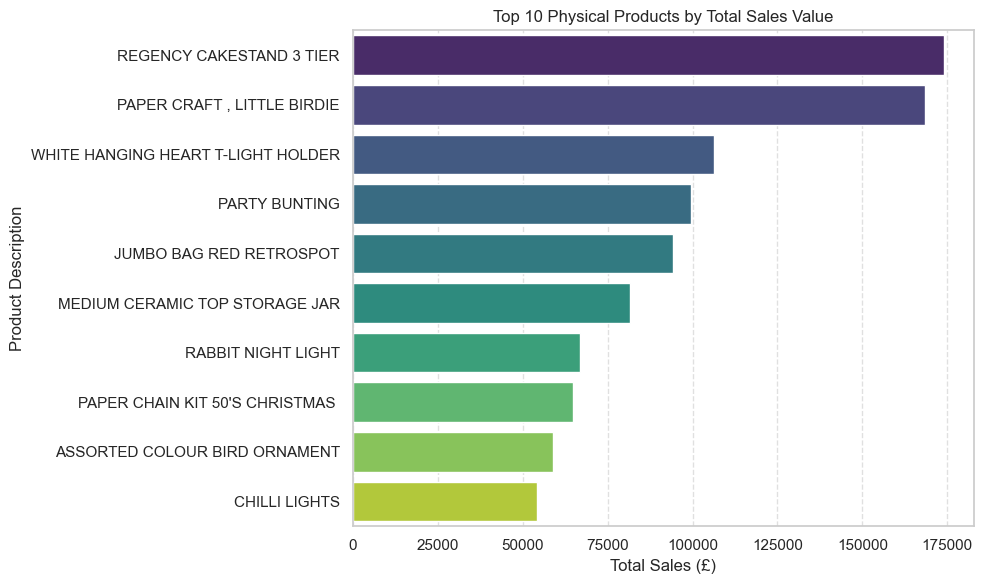

In [122]:
# Step 1: Define and filter out non-product keywords
non_product_keywords = ['manual', 'adjust', 'postage', 'carriage', 'fee', 'bank charges', 'credit', 'debt']
pattern = '|'.join(non_product_keywords)

df_products_only = df_cleaned[~df_cleaned['Description'].str.lower().str.contains(pattern, na=False)].copy()

# Step 2: Optional text cleanup (e.g. remove odd encoding)
df_products_only['Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)

# Step 3: Aggregate total sales per product
top_sales_products = (
    df_products_only.groupby('Description')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 4: Plot the top 10 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales_products, x='TotalPrice', y='Description', palette='viridis')
plt.title('Top 10 Physical Products by Total Sales Value')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [123]:
sns.barplot(
    data=top_total_sales_products,
    x='TotalPrice',
    y='Description',
    hue='Description',
    palette='viridis',
    dodge=False,
    legend=False  # Hide the redundant legend
)


NameError: name 'top_total_sales_products' is not defined

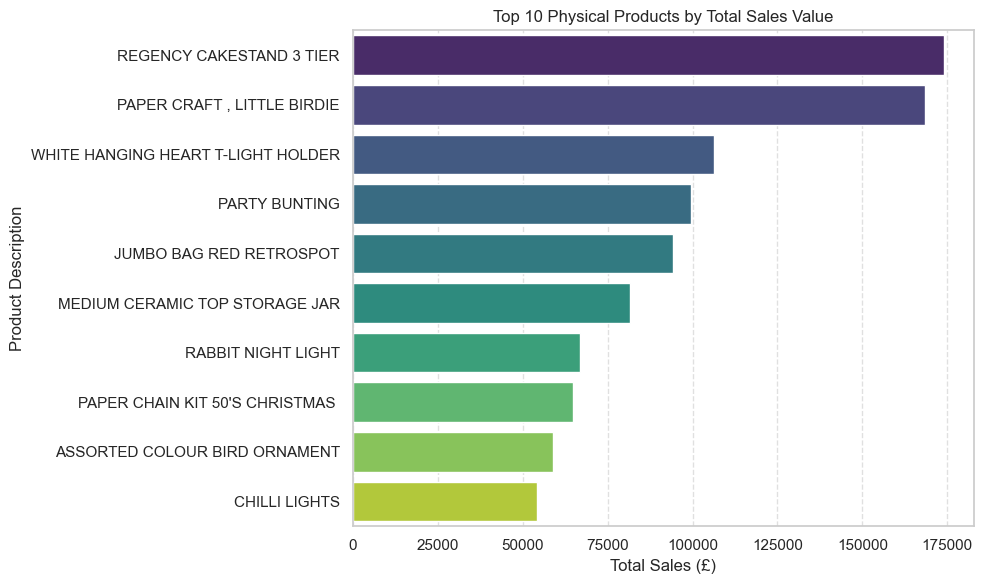

In [ ]:
# Top 10 Products by Total Sales (excluding non-products)
non_product_keywords = ['manual', 'adjust', 'postage', 'carriage', 'fee', 'bank charges']
df_products_only = df_cleaned[~df_cleaned['Description'].str.lower().str.contains('|'.join(non_product_keywords), na=False)].copy()
df_products_only.loc[:, 'Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)

top_total_sales_products = df_products_only.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_total_sales_products,
    x='TotalPrice',
    y='Description',
    hue='Description',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

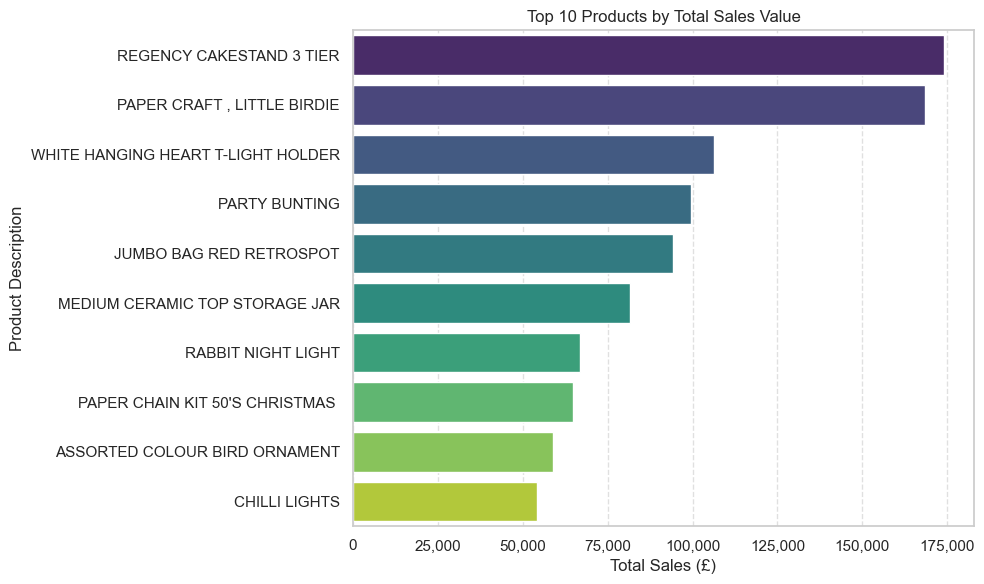

In [125]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Top 10 Products by Total Sales (excluding non-products)
non_product_keywords = ['manual', 'adjust', 'postage', 'carriage', 'fee', 'bank charges']
df_products_only = df_cleaned[~df_cleaned['Description'].str.lower().str.contains('|'.join(non_product_keywords), na=False)].copy()
df_products_only.loc[:, 'Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)

top_total_sales_products = df_products_only.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_total_sales_products,
    x='TotalPrice',
    y='Description',
    hue='Description',
    palette='viridis',
    dodge=False,
    legend=False
)

# Format x-axis ticks with commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


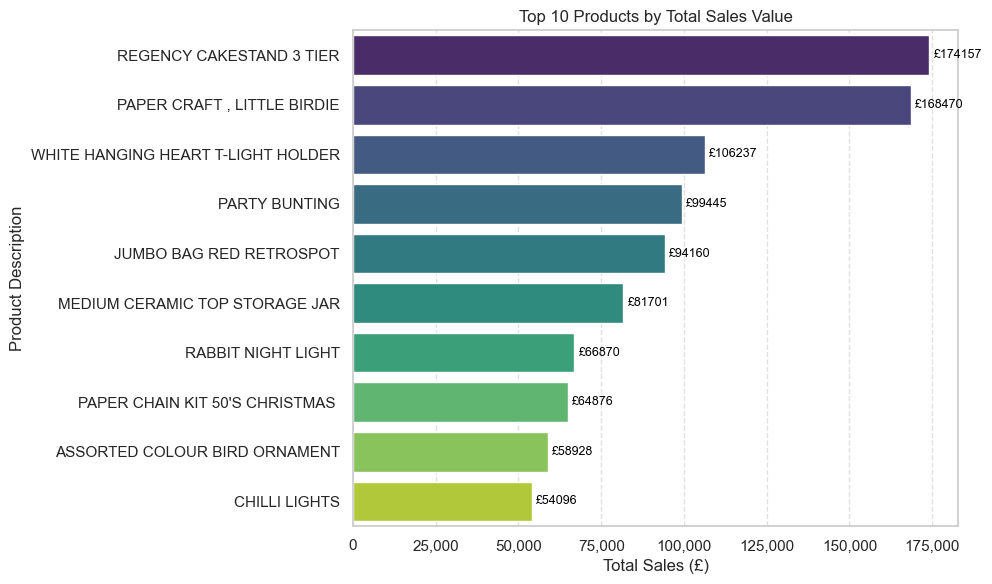

In [126]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Your existing data prep
non_product_keywords = ['manual', 'adjust', 'postage', 'carriage', 'fee', 'bank charges']
df_products_only = df_cleaned[~df_cleaned['Description'].str.lower().str.contains('|'.join(non_product_keywords), na=False)].copy()
df_products_only.loc[:, 'Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)

top_total_sales_products = df_products_only.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_total_sales_products,
    x='TotalPrice',
    y='Description',
    hue='Description',
    palette='viridis',
    dodge=False,
    legend=False
)

# Format x-axis ticks with commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='£{:.0f}',  # Formats the number
        label_type='edge',
        padding=3,
        fontsize=9,
        color='black'
    )

plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


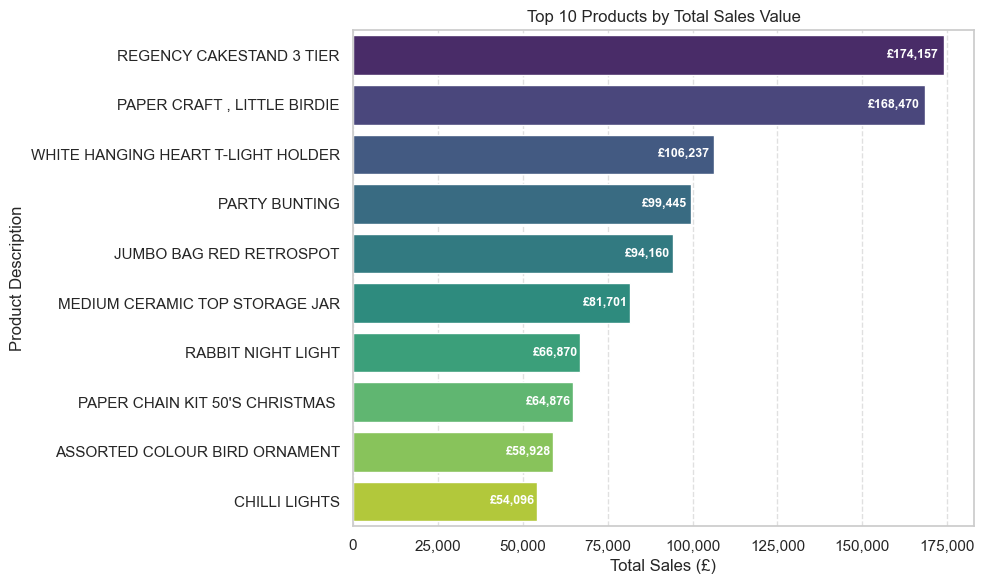

In [127]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Data prep
non_product_keywords = ['manual', 'adjust', 'postage', 'carriage', 'fee', 'bank charges']
df_products_only = df_cleaned[~df_cleaned['Description'].str.lower().str.contains('|'.join(non_product_keywords), na=False)].copy()
df_products_only.loc[:, 'Description'] = df_products_only['Description'].str.replace('Â', '', regex=False)

top_total_sales_products = df_products_only.groupby('Description')['TotalPrice'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_total_sales_products,
    x='TotalPrice',
    y='Description',
    hue='Description',
    palette='viridis',
    dodge=False,
    legend=False
)

# Format x-axis ticks with commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside the bars
for i, (value, name) in enumerate(zip(top_total_sales_products['TotalPrice'], top_total_sales_products['Description'])):
    ax.text(
        value - (value * 0.01),  # slight left offset from bar end
        i,  # y-position based on index
        f'£{value:,.0f}',
        va='center',
        ha='right',  # align text to the right so it stays inside
        fontsize=9,
        color='white',  # change to 'black' if your bars are light-coloured
        fontweight='bold'
    )

plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3856322724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_price_products, x='UnitPrice', y='Description', palette='mako')


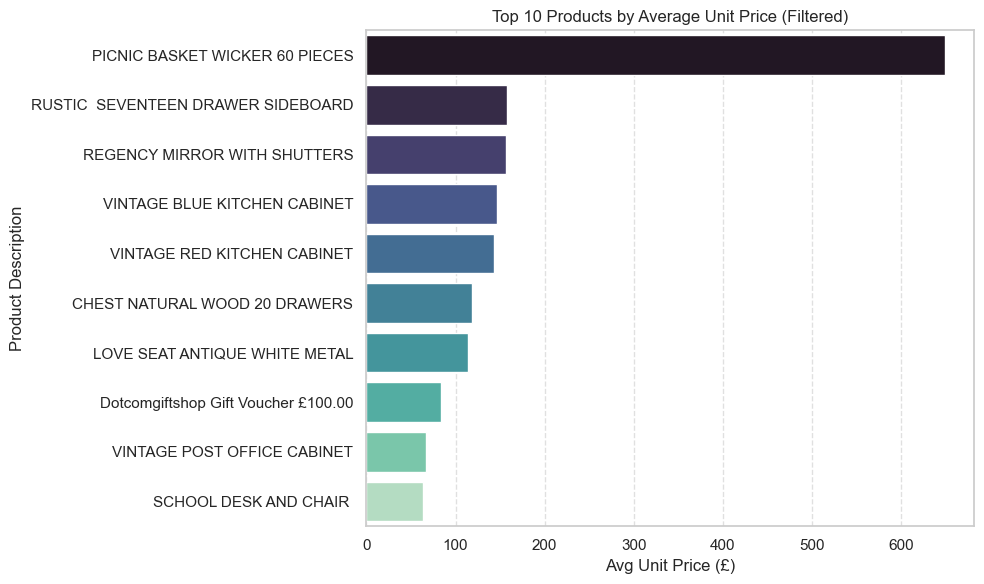

In [128]:
# Get top 10 products by average unit price
top_avg_price_products = df_products_only.groupby('Description')['UnitPrice'].mean().nlargest(10).reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_avg_price_products, x='UnitPrice', y='Description', palette='mako')
plt.title('Top 10 Products by Average Unit Price (Filtered)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

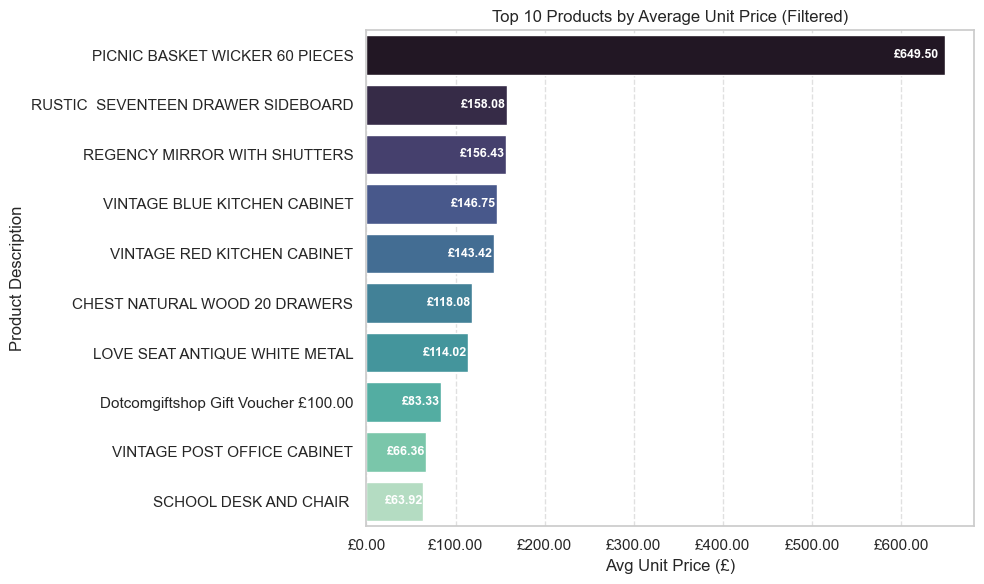

In [131]:
# Get top 10 products by average unit price
avg_unit_price_products = df_products_only.groupby('Description')['UnitPrice'].mean().nlargest(10).reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_unit_price_products,
    x='UnitPrice',
    y='Description',
    hue='Description',        # ensures unique colors
    palette='mako',
    dodge=False,
    legend=False              # disables extra legend
)

# Format x-axis
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(avg_unit_price_products['UnitPrice'], avg_unit_price_products['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Filtered)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [132]:
df_products_only[df_products_only['Description'].str.contains("gift voucher", case=False)].groupby('UnitPrice').size()


UnitPrice
8.33     8
16.67    8
17.02    1
25.00    6
25.53    1
33.33    2
34.04    1
41.67    3
42.55    1
83.33    1
dtype: int64

C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3269495809.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum())
C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3269495809.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_unit_price_weighted, x='AvgUnitPrice', y='Description', palette='mako')


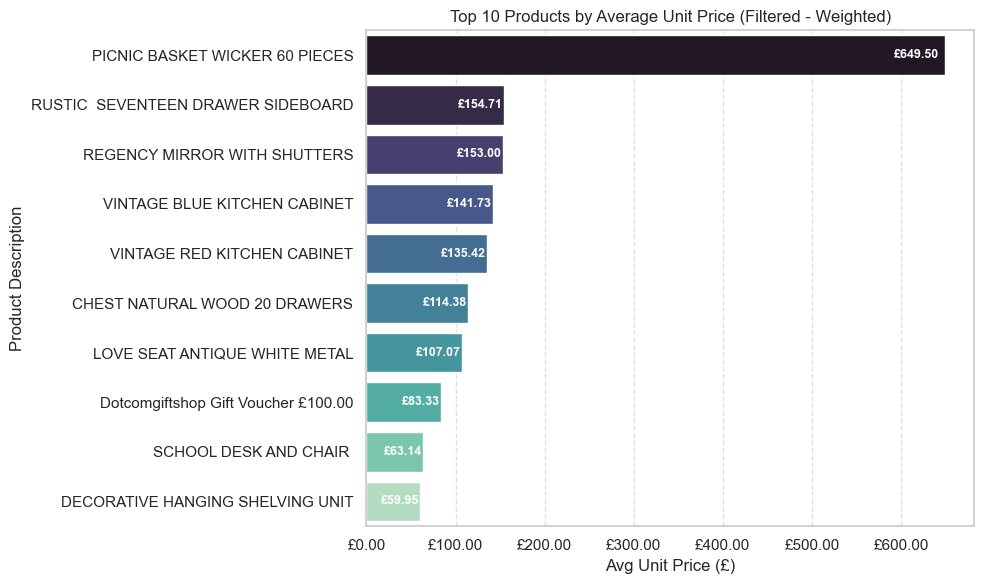

In [135]:
# Calculate weighted average unit price
avg_unit_price_weighted = (
    df_products_only.groupby('Description')
    .apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum())
    .nlargest(10)
    .reset_index(name='AvgUnitPrice')
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_unit_price_weighted, x='AvgUnitPrice', y='Description', palette='mako')

# Format x-axis ticks
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(avg_unit_price_weighted['AvgUnitPrice'], avg_unit_price_weighted['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [133]:
# Filter only transactions with that gift voucher description
voucher_df = df_cleaned[df_cleaned['Description'].str.contains('Gift Voucher', case=False, na=False)]

# View unique Unit Prices and frequency
voucher_summary = voucher_df.groupby('UnitPrice')['Quantity'].sum().reset_index().sort_values(by='UnitPrice', ascending=False)

# Display the breakdown
print("Gift Voucher Transactions Breakdown:")
display(voucher_summary)

# Confirm the actual average unit price
average_price = voucher_df['UnitPrice'].mean()
print(f"\nAverage Unit Price for Gift Voucher: £{average_price:.2f}")


Gift Voucher Transactions Breakdown:


,UnitPrice,Quantity
9,83.33,1
8,42.55,1
7,41.67,3
6,34.04,1
5,33.33,2
4,25.53,1
3,25.00,6
2,17.02,1
1,16.67,9
0,8.33,9



Average Unit Price for Gift Voucher: £23.25


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\942379925.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum())
C:\Users\selin\AppData\Local\Temp\ipykernel_18576\942379925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_avg_price_products, x='AvgUnitPrice', y='Description', palette='mako')


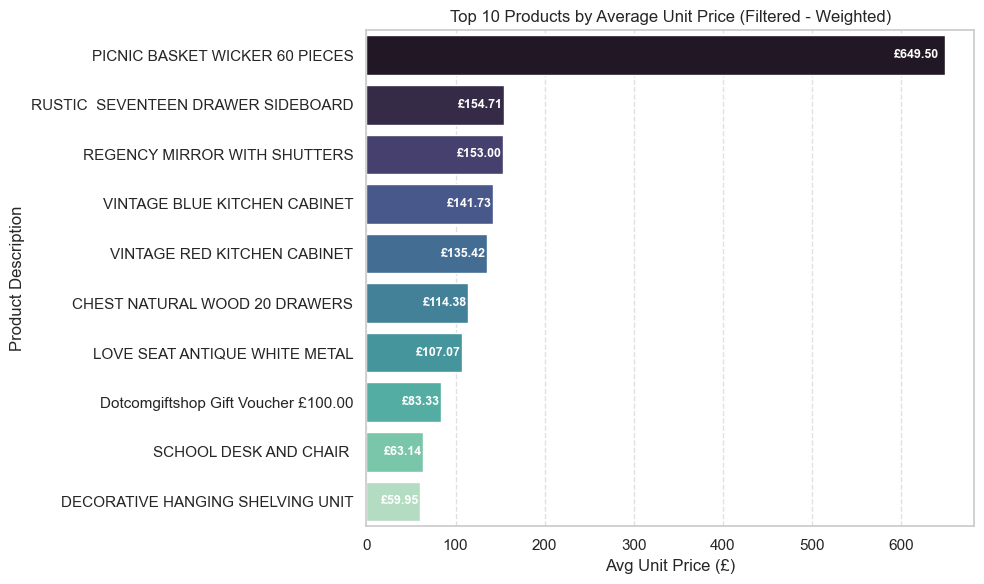

In [134]:
# Calculate weighted average unit price
top_avg_price_products = (
    df_products_only.groupby('Description')
    .apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum())
    .nlargest(10)
    .reset_index(name='AvgUnitPrice')
)

# Bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_avg_price_products, x='AvgUnitPrice', y='Description', palette='mako')

# Add value labels to bars
for i, (value, name) in enumerate(zip(top_avg_price_products['AvgUnitPrice'], top_avg_price_products['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

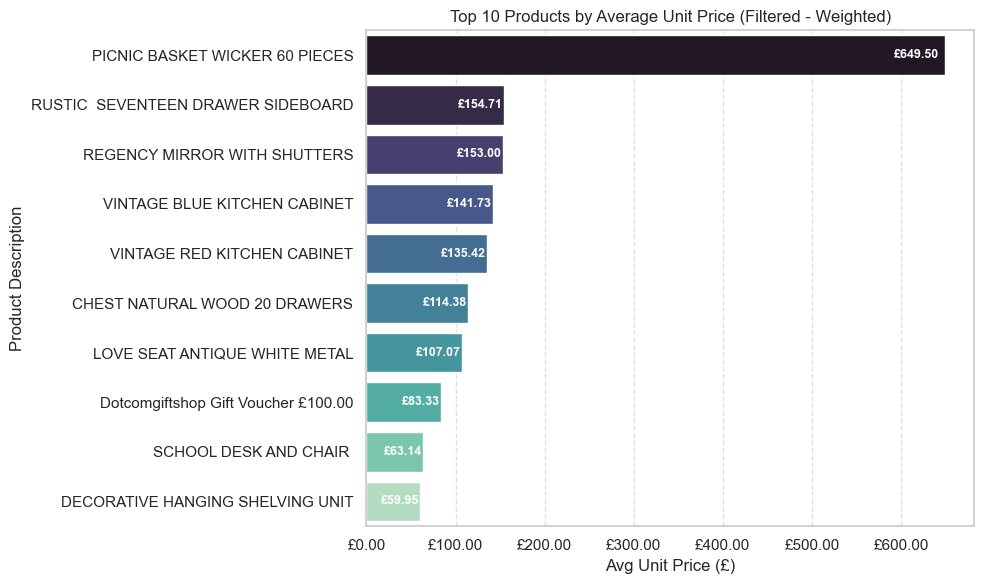

In [136]:
# Step 1: Create a 'Total' column
df_products_only['Total'] = df_products_only['UnitPrice'] * df_products_only['Quantity']

# Step 2: Group and calculate weighted average
avg_unit_price_weighted = (
    df_products_only
    .groupby('Description', as_index=False)
    .agg({'Total': 'sum', 'Quantity': 'sum'})
)
avg_unit_price_weighted['AvgUnitPrice'] = avg_unit_price_weighted['Total'] / avg_unit_price_weighted['Quantity']
avg_unit_price_weighted = avg_unit_price_weighted.nlargest(10, 'AvgUnitPrice')

# Step 3: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_unit_price_weighted,
    x='AvgUnitPrice',
    y='Description',
    hue='Description',
    palette='mako',
    legend=False
)

formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

for i, (value, name) in enumerate(zip(avg_unit_price_weighted['AvgUnitPrice'], avg_unit_price_weighted['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


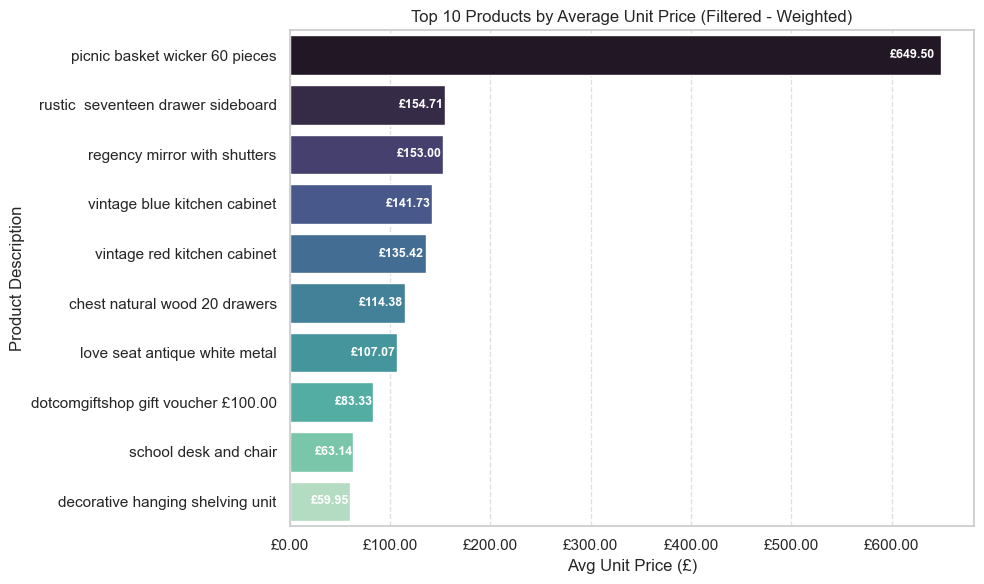

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Step 1: Normalise the Description column (in-place)
df_products_only['Description'] = df_products_only['Description'].str.strip().str.lower()

# Step 2: Calculate weighted average unit price
avg_unit_price_weighted = (
    df_products_only
    .assign(Total=lambda x: x['UnitPrice'] * x['Quantity'])
    .groupby('Description')[['Total', 'Quantity']]
    .sum()
    .assign(AvgUnitPrice=lambda x: x['Total'] / x['Quantity'])
    .nlargest(10, 'AvgUnitPrice')
    .reset_index()
)

# Step 3: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_unit_price_weighted,
    x='AvgUnitPrice',
    y='Description',
    hue='Description',  # fixes FutureWarning
    palette='mako',
    dodge=False,
    legend=False
)

# Format x-axis ticks with pound symbol
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(avg_unit_price_weighted['AvgUnitPrice'], avg_unit_price_weighted['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

# Plot settings
plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [138]:
gift_voucher_row = avg_unit_price_weighted.query("Description == 'gift voucher'")
print(gift_voucher_row)


Empty DataFrame
Columns: [Description, Total, Quantity, AvgUnitPrice]
Index: []


In [139]:
# Explore all unique normalised descriptions
print(df_products_only['Description'].unique())


['white hanging heart t-light holder' 'white metal lantern'
 'cream cupid hearts coat hanger' ... 'letter "u" bling key ring'
 'cream hanging heart t-light holder' 'paper craft , little birdie']


In [140]:
df_products_only[df_products_only['Description'].str.contains('gift', case=False, na=False)]['Description'].unique()


array(['stars gift tape', 'pack of 6 birdy gift tags',
       'pack of 6 sweetie gift boxes', 'small stripes chocolate gift bag',
       'pack of 6 handbag gift boxes', 'pack of 6 pannetone gift boxes',
       'lilac diamante pen in gift box', 'hearts gift tape',
       'cakes and bows gift  tape', 'yuletide images gift wrap set',
       'blue  diamante pen in gift box', 'funky monkey gift bag medium',
       'pink diamante pen in gift box', 'spaceboy gift wrap',
       'silver diamante pen in gift box', 'gift bag psychedelic apples',
       'new england mug w gift box', 'vintage caravan gift wrap',
       'small polkadot chocolate gift bag',
       'green  diamante pen in gift box',
       'large stripes chocolate gift bag', 'pink paisley rose gift wrap',
       'tea time teapot in gift box', 'tea time tea set in gift box',
       'birthday banquet gift wrap', 'gift bag birthday',
       'romantic images gift wrap set', 'curious images gift wrap set',
       'blossom images gift wrap 

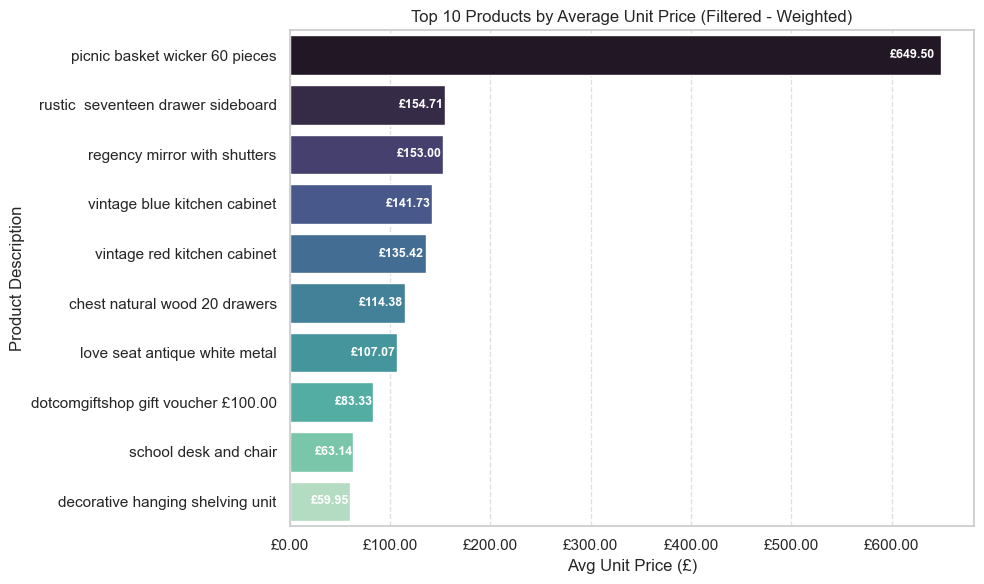

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Step 1: Normalise the Description column (in-place)
df_products_only['Description'] = df_products_only['Description'].str.strip().str.lower()

# Step 2: Calculate weighted average unit price
avg_unit_price_weighted = (
    df_products_only
    .assign(Total=lambda x: x['UnitPrice'] * x['Quantity'])
    .groupby('Description')[['Total', 'Quantity']]
    .sum()
    .assign(AvgUnitPrice=lambda x: x['Total'] / x['Quantity'])
    .nlargest(10, 'AvgUnitPrice')
    .reset_index()
)

# Step 3: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_unit_price_weighted,
    x='AvgUnitPrice',
    y='Description',
    hue='Description',  # fixes FutureWarning
    palette='mako',
    dodge=False,
    legend=False
)

# Format x-axis ticks with pound symbol
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(avg_unit_price_weighted['AvgUnitPrice'], avg_unit_price_weighted['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

# Plot settings
plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [142]:
# Normalise descriptions and unify gift voucher variations
df_products_only['Description'] = (
    df_products_only['Description']
    .str.strip()
    .str.lower()
    .replace(r'dotcomgiftshop gift voucher £\d+\.00', 'gift voucher', regex=True)
)


In [143]:
avg_unit_price_weighted = (
    df_products_only.groupby('Description', group_keys=False)
    .apply(lambda x: pd.Series({
        'Total': (x['UnitPrice'] * x['Quantity']).sum(),
        'Quantity': x['Quantity'].sum(),
        'AvgUnitPrice': (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum()
    }))
    .sort_values('AvgUnitPrice', ascending=False)
    .reset_index()
)


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\3672271938.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [144]:
df_products_only['Description'] = (
    df_products_only['Description']
    .str.strip()
    .str.lower()
    .replace(r'dotcomgiftshop gift voucher £\d+\.00', 'gift voucher', regex=True)
)


In [145]:
avg_unit_price_weighted = (
    df_products_only.groupby('Description', group_keys=False)
    .apply(
        lambda x: pd.Series({
            'Total': (x['UnitPrice'] * x['Quantity']).sum(),
            'Quantity': x['Quantity'].sum(),
            'AvgUnitPrice': (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum()
        }),
        include_groups=False  # 👈 this fixes the deprecation warning
    )
    .sort_values('AvgUnitPrice', ascending=False)
    .reset_index()
)


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\432658665.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10, x='AvgUnitPrice', y='Description', palette='mako')


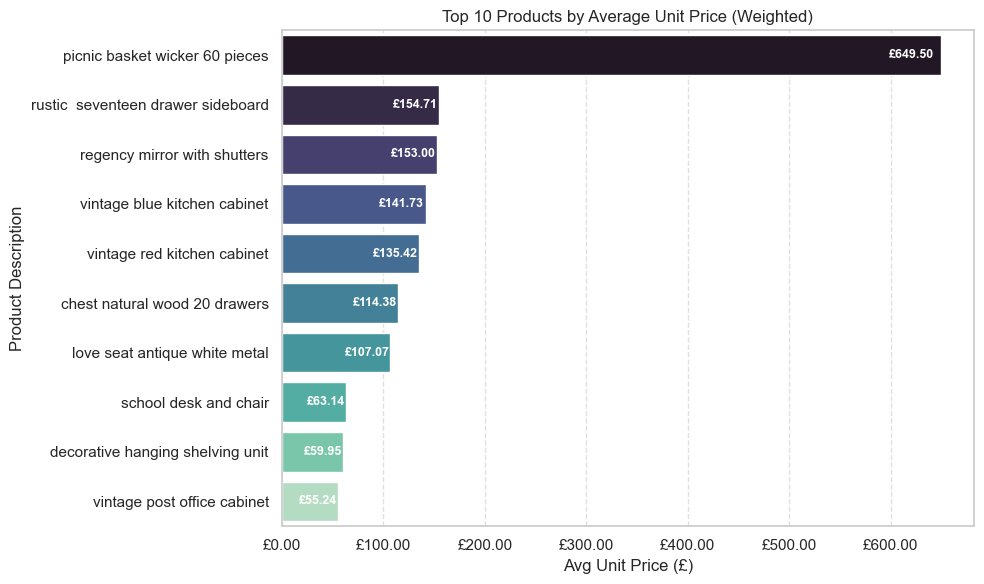

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Clean and normalise descriptions
df_products_only['Description'] = (
    df_products_only['Description']
    .str.strip()
    .str.lower()
    .replace(r'dotcomgiftshop gift voucher £\d+\.00', 'gift voucher', regex=True)
)

# 2. Calculate weighted average unit price (with deprecation warning handled)
avg_unit_price_weighted = (
    df_products_only.groupby('Description', group_keys=False)
    .apply(
        lambda x: pd.Series({
            'Total': (x['UnitPrice'] * x['Quantity']).sum(),
            'Quantity': x['Quantity'].sum(),
            'AvgUnitPrice': (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum()
        }),
        include_groups=False
    )
    .sort_values('AvgUnitPrice', ascending=False)
    .reset_index()
)

# 3. Get top 10 products by average unit price
top10 = avg_unit_price_weighted.nlargest(10, 'AvgUnitPrice')

# 4. Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10, x='AvgUnitPrice', y='Description', palette='mako')

# Format x-axis ticks as £ currency
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(top10['AvgUnitPrice'], top10['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\selin\AppData\Local\Temp\ipykernel_18576\4235403495.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10, x='AvgUnitPrice', y='Description', palette='mako')


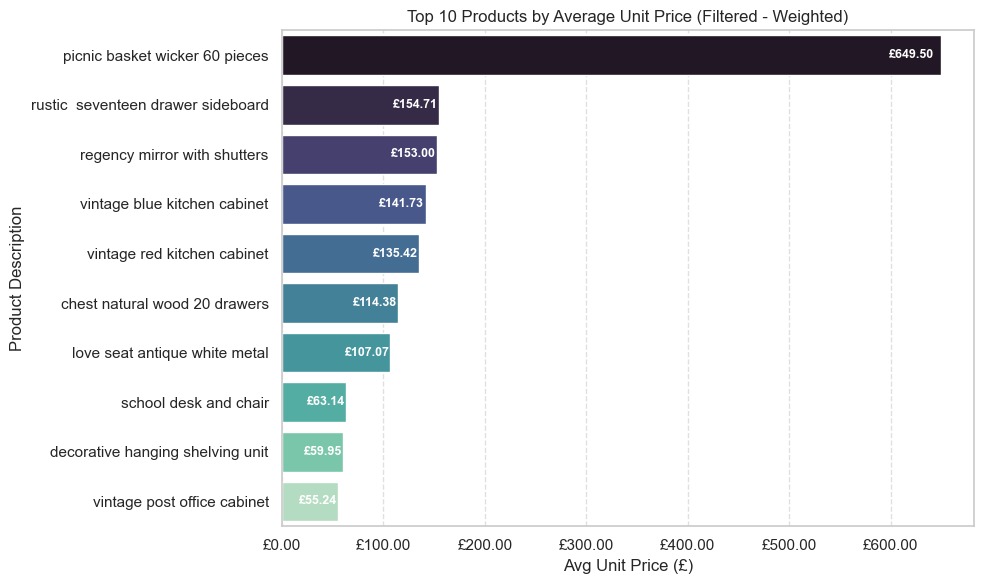

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Clean and normalise descriptions
df_products_only['Description'] = (
    df_products_only['Description']
    .str.strip()
    .str.lower()
    .replace(r'dotcomgiftshop gift voucher £\d+\.00', 'gift voucher', regex=True)
)

# 2. Calculate weighted average unit price (with deprecation warning handled)
avg_unit_price_weighted = (
    df_products_only.groupby('Description', group_keys=False)
    .apply(
        lambda x: pd.Series({
            'Total': (x['UnitPrice'] * x['Quantity']).sum(),
            'Quantity': x['Quantity'].sum(),
            'AvgUnitPrice': (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum()
        }),
        include_groups=False
    )
    .sort_values('AvgUnitPrice', ascending=False)
    .reset_index()
)

# 3. Get top 10 products by average unit price
top10 = avg_unit_price_weighted.nlargest(10, 'AvgUnitPrice')

# 4. Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10, x='AvgUnitPrice', y='Description', palette='mako')

# Format x-axis ticks as £ currency
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(top10['AvgUnitPrice'], top10['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\selin\AppData\Local\Temp\ipykernel_18576\772684923.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10, x='AvgUnitPrice', y='Description', palette='mako')


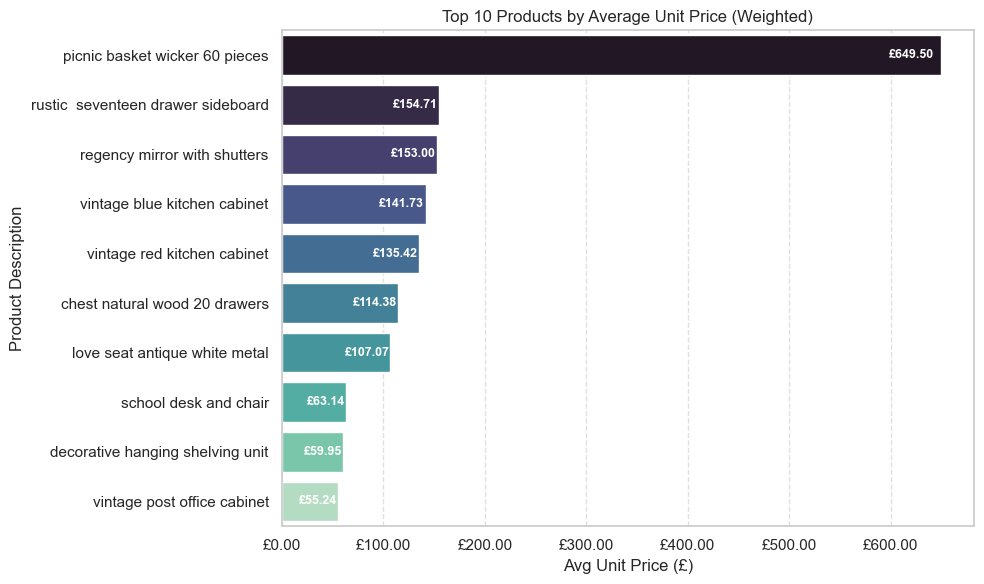

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Clean and normalise descriptions
df_products_only['Description'] = (
    df_products_only['Description']
    .str.strip()
    .str.lower()
    .replace(r'dotcomgiftshop gift voucher £\d+\.00', 'gift voucher', regex=True)
)

# 2. Calculate weighted average unit price (with deprecation warning handled)
avg_unit_price_weighted = (
    df_products_only.groupby('Description', group_keys=False)
    .apply(
        lambda x: pd.Series({
            'Total': (x['UnitPrice'] * x['Quantity']).sum(),
            'Quantity': x['Quantity'].sum(),
            'AvgUnitPrice': (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum()
        }),
        include_groups=False
    )
    .sort_values('AvgUnitPrice', ascending=False)
    .reset_index()
)

# 3. Get top 10 products by average unit price
top10 = avg_unit_price_weighted.nlargest(10, 'AvgUnitPrice')

# 4. Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10, x='AvgUnitPrice', y='Description', palette='mako')

# Format x-axis ticks as £ currency
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(top10['AvgUnitPrice'], top10['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

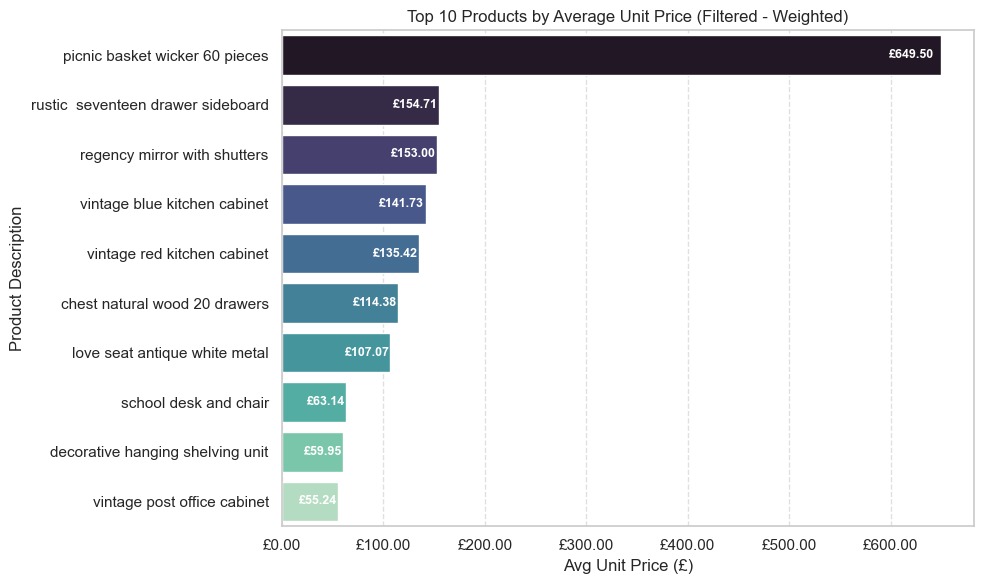

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Clean and normalise descriptions
df_products_only['Description'] = (
    df_products_only['Description']
    .str.strip()
    .str.lower()
    .replace(r'dotcomgiftshop gift voucher £\d+\.00', 'gift voucher', regex=True)
)

# 2. Calculate weighted average unit price (with deprecation warning handled)
avg_unit_price_weighted = (
    df_products_only.groupby('Description', group_keys=False)
    .apply(
        lambda x: pd.Series({
            'Total': (x['UnitPrice'] * x['Quantity']).sum(),
            'Quantity': x['Quantity'].sum(),
            'AvgUnitPrice': (x['UnitPrice'] * x['Quantity']).sum() / x['Quantity'].sum()
        }),
        include_groups=False
    )
    .sort_values('AvgUnitPrice', ascending=False)
    .reset_index()
)

# 3. Get top 10 products by average unit price
top10 = avg_unit_price_weighted.nlargest(10, 'AvgUnitPrice')

# 4. Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10,
    x='AvgUnitPrice',
    y='Description',
    hue='Description',
    palette='mako',
    dodge=False,
    legend=False
)

# Format x-axis ticks as £ currency
formatter = FuncFormatter(lambda x, _: f'£{x:,.2f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels inside bars
for i, (value, name) in enumerate(zip(top10['AvgUnitPrice'], top10['Description'])):
    ax.text(
        value - (value * 0.01),
        i,
        f'£{value:,.2f}',
        va='center',
        ha='right',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.title('Top 10 Products by Average Unit Price (Filtered - Weighted)')
plt.xlabel('Avg Unit Price (£)')
plt.ylabel('Product Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [150]:
# Define a list of non-physical product keywords
non_physical_keywords = [
    'fee', 'postage', 'carriage', 'adjust', 'manual', 'charge', 'bank',
    'dotcom', 'amazon', 'debt', 'discount', 'credit', 'refund'
]

# Identify matching rows
non_physical_products = df_cleaned[
    df_cleaned['Description'].str.lower().str.contains('|'.join(non_physical_keywords), na=False)
][['StockCode', 'Description']].drop_duplicates().sort_values('Description')

# Display result
non_physical_products.head(20)  # adjust head() to show more if needed

,StockCode,Description
15017,AMAZONFEE,AMAZON FEE
299982,B,Adjust bad debt
29399,22932,BAKING MOULD TOFFEE CUP CHOCOLATE
17259,22932,BAKING MOULD TOFFEE CUP CHOCOLATE
3341,21518,BANK ACCOUNT GREETING CARD
43147,85168B,BLACK BAROQUE CARRIAGE CLOCK
3929,85159A,"BLACK TEA,COFFEE,SUGAR JARS"
4626,21399,BLUE POLKADOT COFFEE MUG
4406,BANK CHARGES,Bank Charges
1423,C2,CARRIAGE


In [151]:
# Define StockCodes and labels for admin/non-physical items
admin_fee_codes = {
    'AMAZONFEE': 'AMAZON FEE',
    'B': 'Adjust bad debt',
    'BANK CHARGES': 'Bank Charges',
    'C2': 'CARRIAGE'
}

# Filter df_cleaned and aggregate TotalPrice
admin_fee_totals = df_cleaned[df_cleaned['StockCode'].isin(admin_fee_codes.keys())] \
    .groupby('StockCode', as_index=False)['TotalPrice'].sum()

# Add readable labels
admin_fee_totals['Description'] = admin_fee_totals['StockCode'].map(admin_fee_codes)

# Display results
admin_fee_totals = admin_fee_totals[['StockCode', 'Description', 'TotalPrice']]
display(admin_fee_totals)


,StockCode,Description,TotalPrice
0,AMAZONFEE,AMAZON FEE,13761.090
1,B,Adjust bad debt,11062.060
2,BANK CHARGES,Bank Charges,165.001
3,C2,CARRIAGE,7051.000


In [152]:
non_physical_items = [
    ('AMAZONFEE', 'AMAZON FEE'),
    ('B', 'Adjust bad debt'),
    ('BANK CHARGES', 'Bank Charges'),
    ('C2', 'CARRIAGE')
]

admin_cost_summary = df_cleaned[df_cleaned['StockCode'].isin([x[0] for x in non_physical_items])]
admin_cost_summary = admin_cost_summary.groupby(['StockCode', 'Description'])['TotalPrice'].sum().reset_index()
display(admin_cost_summary)

,StockCode,Description,TotalPrice
0,AMAZONFEE,AMAZON FEE,13761.090
1,B,Adjust bad debt,11062.060
2,BANK CHARGES,Bank Charges,165.001
3,C2,CARRIAGE,7051.000


In [153]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [157]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12
